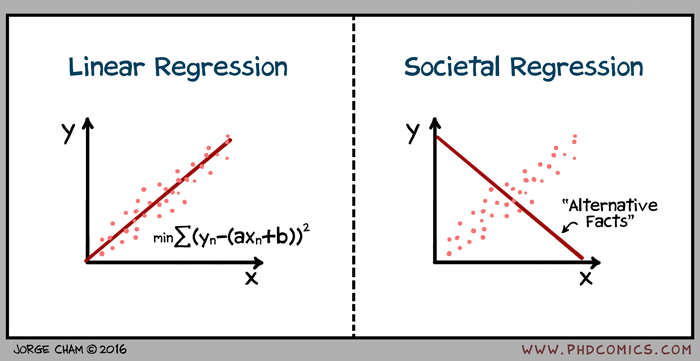

<h1>S09 T02: Supervised Learning - Regressions</h1>

In [1]:
#Python Modules
from datetime import datetime,date
import random
import math
import math

#Data Manipulation
import pandas as pd
import numpy as np

#Data Modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate,cross_val_predict
from scipy import stats
import category_encoders as ce

#Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text

<h2>Notebook Functions</h2>

In [2]:
#1: Percent of nan values
def percent_nan(df):
    return round((df.isnull().sum()/df.shape[0])*100,2) 

In [3]:
#2: impute nan with zeros
def imputation_nan_zero(df,list_col):
    for i in list_col:
        df[i] = df[i].fillna(0) 

In [4]:
#3: correlation matrix 

def matrix_plot (df,name):

    fig, ax = plt.subplots(figsize=(15, 15))

# Data
    corr_matrix= df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
    half_matrix = np.triu(corr_matrix)

# Heatmap Matrix
    sns.heatmap(corr_matrix, annot=True, mask = half_matrix, cmap=sns.color_palette('YlOrBr', as_cmap=True),annot_kws = {"size": 10})
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,horizontalalignment = 'right',)
    ax.set_yticklabels(ax.get_yticklabels(),rotation = 0,horizontalalignment = 'right',)
    ax.tick_params(labelsize = 15)
    fig.suptitle(name, fontsize = 13, fontweight = "bold")
    plt.show()
    

In [5]:
#4: Variance Inflation Factor(VIF)
def vif(Z):
    vif_data = pd.DataFrame()  
    vif_data['feature'] = Z.columns  
    vif_data['Variance Inflation Factor(VIF)'] = [variance_inflation_factor(Z.values, i) for i in range(len(Z.columns))]
    return vif_data

In [6]:
#5: Transform type 
def astype_convertion(df,col,dtype):
    for i in col: 
        df[col] = df[col].astype(dtype)

In [7]:
#6 convert time to ordinal value
def time_to_ordinal(df,col,newCol):
    df[newCol] = df[col].apply(lambda x: x.toordinal())

In [8]:
#7 obtain metric of models
def comparation_model(model,prediction):
    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test ,prediction)
    print(model)
    print('Coefficient of determination(R^2):',r2)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Squared Error (RMSE):', math.sqrt(mean_squared_error(y_test ,prediction)))
    print('Mean Absolute Error (MAE):', mean_absolute_error(y_test,prediction))
    return r2,mse
    

In [9]:
#8 plot the actual vs predicted values

def plot_predictions(df,actual,predicted):
    fig = plt.subplots(figsize=(8,5))
    fig = sns.scatterplot(x= actual,y= predicted,data= df,
                     palette= "b" , alpha=0.5)
    plt.show()

In [10]:
#9 plot the train-test vs cross-validate, metrics and prediction

def subplots_crossvalidation_train(main_title,actual_tt,predicted_tt,r2_tt,mse_tt,df,
                                   y,y_predicted,scores):
    fig , axes = plt.subplots(1,2,figsize=(8,10))
    
    fig = sns.scatterplot(x=actual_tt,y=predicted_tt,data=df,
                  palette= "b" , alpha=0.5,
                  label= "Train-Test" , ax=axes[0])
    fig = sns.scatterplot(x=y,y=y_predicted ,
                  palette= "b" , alpha=0.5,
                  label= "Cross-Validation" , ax=axes[1])
    
    label1_r = r2_tt
    label1_mse = mse_tt
    label2_r= scores["train_r2"].mean()
    label2_mse = -scores["test_neg_mean_squared_error"].mean()
    
    l1_score= (r"R^2={:.7f}" + "\n" + r"MSE={:.7f}").format(
            r2_tt,
            mse_tt)
    l2_score= (r"R^2={:.7f}" + "\n" + r"MSE={:.7f}").format(
            scores["train_r2"].mean(),
            -scores["test_neg_mean_squared_error"].mean())
    
    
    axes[0].set_title("Train-Test")
    axes[1].set_title("Cross-Validation")

    axes[0].legend([l1_score],
                  loc="best")
    axes[1].legend([l2_score],
                  loc="best")
    axes[1].set_xlabel('Actual')
    
    plt.suptitle(main_title)

    plt.show()

In [11]:
#10 plot the train-test vs cross-validate, metrics and prediction for the linear models


def line_plot_model_comparison(x1,y1,df1,r2,mse,x2,y2,scores,title):
    fig , axes = plt.subplots(1,2,figsize=(8,10))

    fig = sns.regplot(x=x1, y=y1, data=df1,
                  line_kws={"color": "red"},scatter_kws={'alpha':0.5},
                  label= "Train-Test" , ax=axes[0])
    fig = sns.regplot(x2,y2, 
                  line_kws={"color": "red"},scatter_kws={'alpha':0.5},
                  label= "Cross-Validation" , ax=axes[1])

    axes[0].set_title("Train-Test")
    axes[1].set_title("Cross-Validation")


    l1_score= (r"R^2={:.7f}" + "\n" + r"MSE={:.7f}").format(
            r2,
            mse)
    l2_score= (r"R^2={:.7f}" + "\n" + r"MSE={:.7f}").format(
            scores["train_r2"].mean(),
            -scores["test_neg_mean_squared_error"].mean())
    

    axes[0].legend([l1_score],
                  loc="best")
    axes[1].legend([l2_score],
                  loc="best")
    axes[1].set_xlabel('Actual')

    plt.suptitle(title)

    plt.show()
    

<h2>DEA</h2>

**This dataset is composed by the following variables:**<br>
**Year** 2008 <br>
**Month** 1-12 <br>
**DayofMonth** 1-31 <br>
**DayOfWeek** 1 (Monday) - 7 (Sunday)<br>
**DepTime** actual departure time (local, hhmm)<br>
**CRSDepTime** scheduled departure time (local, hhmm)<br>
**ArrTime** actual arrival time (local, hhmm)<br>
**CRSArrTime** scheduled arrival time (local, hhmm)<br>
**UniqueCarrier** unique carrier code<br>
**FlightNum** flight number<br>
**TailNum** plane tail number: aircraft registration, unique aircraft identifier<br>
**ActualElapsedTime** in minutes<br>
**CRSElapsedTime** in minutes<br>
**AirTime** in minutes<br>
**ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).<br>
**DepDelay** departure delay, in minutes<br>
**Origin** origin IATA airport code<br>
**Dest** destination IATA airport code<br>
**Distance** in miles<br>
**TaxiIn** taxi in time, in minutes<br>
**TaxiOut** taxi out time in minutes<br>
**Cancelled** was the flight cancelled<br>
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) <br>
**Diverted** 1 = yes, 0 = no<br>
**CarrierDelay in minutes:** Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.<br>
**WeatherDelay in minutes:** Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.<br>
**NASDelay in minutes:** Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.<br>
**SecurityDelay in minutes:** Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.<br>
**LateAircraftDelay in minutes:** Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.<br>

**The dataset used in this notebook can be found in Kaggle. Use the below link to access it**
<a href="https://www.kaggle.com/datasets/giovamata/airlinedelaycauses">Airlane Delay</a>

In [12]:
#Read the file
data = pd.read_csv("/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S03/Airline_Delay/DelayedFlights.csv",
                 parse_dates=[["Year", "Month","DayofMonth"]]) 

In [13]:
data.head()

,Year_Month_DayofMonth,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,0,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,1,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,4,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008-01-03,5,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [14]:
df = data.copy()

In [15]:
df.rename(columns={"Year_Month_DayofMonth":"Date"},inplace=True)

In [16]:
df.head()

,Date,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,0,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008-01-03,1,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008-01-03,2,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008-01-03,4,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008-01-03,5,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [17]:
data.shape

(1936758, 28)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Year_Month_DayofMonth  datetime64[ns]
 1   Unnamed: 0             int64         
 2   DayOfWeek              int64         
 3   DepTime                float64       
 4   CRSDepTime             int64         
 5   ArrTime                float64       
 6   CRSArrTime             int64         
 7   UniqueCarrier          object        
 8   FlightNum              int64         
 9   TailNum                object        
 10  ActualElapsedTime      float64       
 11  CRSElapsedTime         float64       
 12  AirTime                float64       
 13  ArrDelay               float64       
 14  DepDelay               float64       
 15  Origin                 object        
 16  Dest                   object        
 17  Distance               int64         
 18  TaxiIn                

In [19]:
df.isnull().sum()

Date                      0
Unnamed: 0                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [20]:
#use the function (1) to find the percent of nan values
percent_nan(df)

Date                  0.00
Unnamed: 0            0.00
DayOfWeek             0.00
DepTime               0.00
CRSDepTime            0.00
ArrTime               0.37
CRSArrTime            0.00
UniqueCarrier         0.00
FlightNum             0.00
TailNum               0.00
ActualElapsedTime     0.43
CRSElapsedTime        0.01
AirTime               0.43
ArrDelay              0.43
DepDelay              0.00
Origin                0.00
Dest                  0.00
Distance              0.00
TaxiIn                0.37
TaxiOut               0.02
Cancelled             0.00
CancellationCode      0.00
Diverted              0.00
CarrierDelay         35.59
WeatherDelay         35.59
NASDelay             35.59
SecurityDelay        35.59
LateAircraftDelay    35.59
dtype: float64

In [21]:
df.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
Date,1936758,2008-06-19 04:49:06.844572416,2008-01-01 00:00:00,2008-03-18 00:00:00,2008-06-14 00:00:00,2008-09-09 00:00:00,2008-12-31 00:00:00,NaN
Unnamed: 0,1936758.0,3341651.151336,0.0,1517452.5,3242558.0,4972466.75,7009727.0,2066064.95752
DayOfWeek,1936758.0,3.984827,1.0,2.0,4.0,6.0,7.0,1.995966
DepTime,1936758.0,1518.534117,1.0,1203.0,1545.0,1900.0,2400.0,450.485255
CRSDepTime,1936758.0,1467.472644,0.0,1135.0,1510.0,1815.0,2359.0,424.7668
ArrTime,1929648.0,1610.140629,1.0,1316.0,1715.0,2030.0,2400.0,548.178143
CRSArrTime,1936758.0,1634.224641,0.0,1325.0,1705.0,2014.0,2400.0,464.634712
FlightNum,1936758.0,2184.263236,1.0,610.0,1543.0,3422.0,9742.0,1944.70225
ActualElapsedTime,1928371.0,133.305863,14.0,80.0,116.0,165.0,1114.0,72.060069
CRSElapsedTime,1936560.0,134.302744,-25.0,82.0,116.0,165.0,660.0,71.341439


In [22]:
df.describe(include="object").T

,count,unique,top,freq
UniqueCarrier,1936758,20,WN,377602
TailNum,1936753,5366,N325SW,965
Origin,1936758,303,ATL,131613
Dest,1936758,304,ORD,108984
CancellationCode,1936758,4,N,1936125


<h2> Preproccesing Data</h2>

In [23]:
#remove the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [24]:
df.sample(10).T

,1775302,556909,1134430,485767,1164476,769250,1034247,1900774,266768,995723
Date,2008-12-24 00:00:00,2008-03-03 00:00:00,2008-07-21 00:00:00,2008-03-15 00:00:00,2008-07-11 00:00:00,2008-05-08 00:00:00,2008-06-06 00:00:00,2008-12-06 00:00:00,2008-02-23 00:00:00,2008-06-02 00:00:00
DayOfWeek,3,1,1,6,5,4,5,6,6,1
DepTime,1713.0,1036.0,1015.0,1801.0,2325.0,1239.0,1848.0,942.0,1142.0,1611.0
CRSDepTime,1250,945,915,1632,2300,1222,1700,935,909,1510
ArrTime,2018.0,1508.0,1152.0,1848.0,29.0,1345.0,1948.0,1204.0,1425.0,2149.0
CRSArrTime,1454,1234,1105,1714,24,1330,1801,1225,1204,2059
UniqueCarrier,XE,CO,OH,EV,US,YV,9E,AA,UA,F9
FlightNum,3064,147,5306,4827,1738,7167,5601,1067,1596,516
TailNum,N26549,N14629,N818CA,N906EV,N768US,N650ML,84239E,N234AA,N852UA,N907FR
ActualElapsedTime,185.0,272.0,157.0,107.0,64.0,126.0,60.0,142.0,103.0,218.0


**The original dataframe has more than 35% of NaN's values in the delay features, this is because there zero delay (minutes) of the flight.** 

**There is two option, drop the NaN value in this features or fill them with zeros. I will choose the second option because this might be important for the prediction of the ArrDelay.**

**This decisión is supported by the empirical observation of the features values when every delay feature is NaN when the real feature values is  zero.**

In [25]:
fill_nan_zero = ["WeatherDelay","CarrierDelay","NASDelay","SecurityDelay","LateAircraftDelay"]                                                                                  

In [26]:
#use the function (2)to imputate nan with zeros
imputation_nan_zero(df,fill_nan_zero)

In [27]:
change_bool_cols = ['Cancelled','Diverted']
change_bool_cols

['Cancelled', 'Diverted']

In [28]:
change_date_cols = ['DepTime', 'ArrTime','CRSDepTime', 'CRSArrTime']

In [29]:
#use function (5) to change the dtype
astype_convertion(df,change_bool_cols,"bool")

In [30]:
#drop the remaining NaN values
df.dropna(inplace=True)

In [31]:
numeric_cols = df.select_dtypes([np.number]).columns
numeric_cols

Index(['DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [32]:
#use function (5) to change the dtype
astype_convertion(df,numeric_cols,"int64")

*change format to datetime* 

In [33]:
date_cols = ["DepTime","ArrTime","CRSArrTime","CRSDepTime"]

The linear regresion doesnt work with dates and times format, I will transform the date to a ordinal value but I can't convert it with time, so i will leave it as int64.    

In [34]:
#run function (6) add a new feature named DateOrdinal
time_to_ordinal(df,"Date","OrdinalDate")

In [35]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00
DayOfWeek,4,4,4,4,4,4,4,4,4,4
DepTime,2003,754,628,1829,1940,1937,706,1644,1029,1452
CRSDepTime,1955,735,620,1755,1915,1830,700,1510,1020,1425
ArrTime,2211,1002,804,1959,2121,2037,916,1845,1021,1640
CRSArrTime,2225,1000,750,1925,2110,1940,915,1725,1010,1625
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN
FlightNum,335,3231,448,3920,378,509,100,1333,2272,675
TailNum,N712SW,N772SW,N428WN,N464WN,N726SW,N763SW,N690SW,N334SW,N263WN,N286WN
ActualElapsedTime,128,128,96,90,101,240,130,121,52,228


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 1936757
Data columns (total 28 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DayOfWeek          int64         
 2   DepTime            int64         
 3   CRSDepTime         int64         
 4   ArrTime            int64         
 5   CRSArrTime         int64         
 6   UniqueCarrier      object        
 7   FlightNum          int64         
 8   TailNum            object        
 9   ActualElapsedTime  int64         
 10  CRSElapsedTime     int64         
 11  AirTime            int64         
 12  ArrDelay           int64         
 13  DepDelay           int64         
 14  Origin             object        
 15  Dest               object        
 16  Distance           int64         
 17  TaxiIn             int64         
 18  TaxiOut            int64         
 19  Cancelled          bool          
 20  CancellationCode   objec

In [37]:
#categorical features of the df
categorical_cols = df.select_dtypes(object).columns
categorical_cols

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], dtype='object')

In [38]:
#create the categorical values names for encoding

encoding_variables_names = []

for i in categorical_cols:
    name = "encoded_" + i
    encoding_variables_names.append(name)

encoding_variables_names

['encoded_UniqueCarrier',
 'encoded_TailNum',
 'encoded_Origin',
 'encoded_Dest',
 'encoded_CancellationCode']

In [39]:
#loop the encoding code for the categorical values

for c,ev in zip(categorical_cols,encoding_variables_names):
    ev = ce.TargetEncoder(cols=c)
    df[c]= ev.fit_transform(df[c],df['ArrDelay'])

In [40]:
df.head(5).T

,0,1,2,3,4
Date,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,1829,1940
CRSDepTime,1955,735,620,1755,1915
ArrTime,2211,1002,804,1959,2121
CRSArrTime,2225,1000,750,1925,2110
UniqueCarrier,30.087884,30.087884,30.087884,30.087884,30.087884
FlightNum,335,3231,448,3920,378
TailNum,32.345312,30.708075,27.570952,37.931721,35.086957
ActualElapsedTime,128,128,96,90,101


The categirucal features now have a numerical value

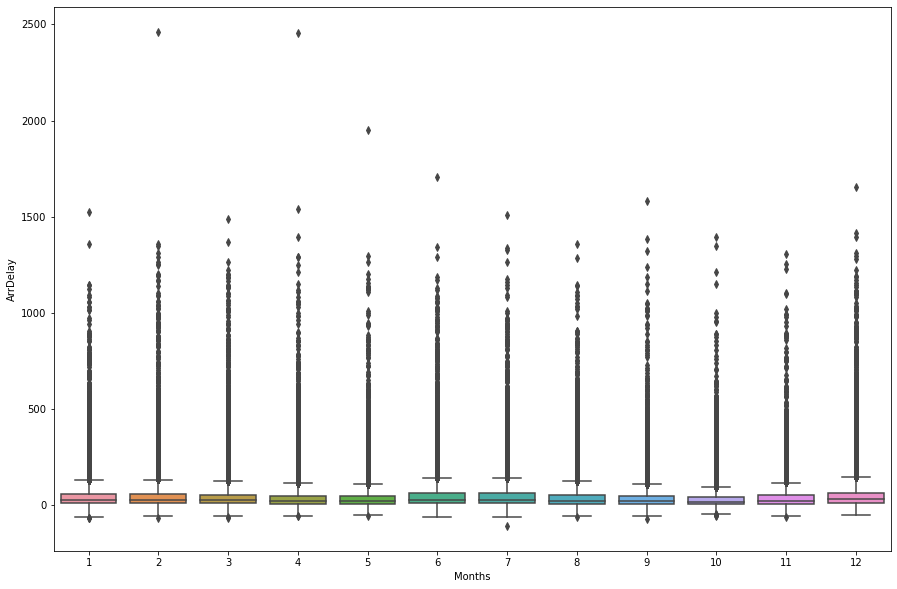

In [41]:
fig = plt.subplots(figsize=(15, 10))

moths = df['Date'].dt.month

fig = sns.boxplot(x = moths , y=df["ArrDelay"])
plt.xlabel("Months")
plt.show()

The boxplot shows that there are many outtliers values, this are the delayed values.

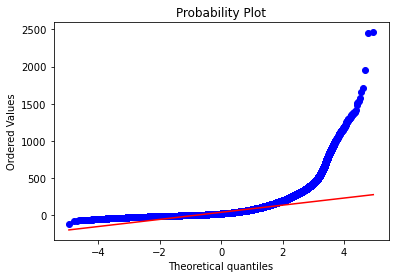

In [42]:
stats.probplot(df["ArrDelay"],plot=plt)
plt.show()

The QQplot suggest that the data distribution is skewed  

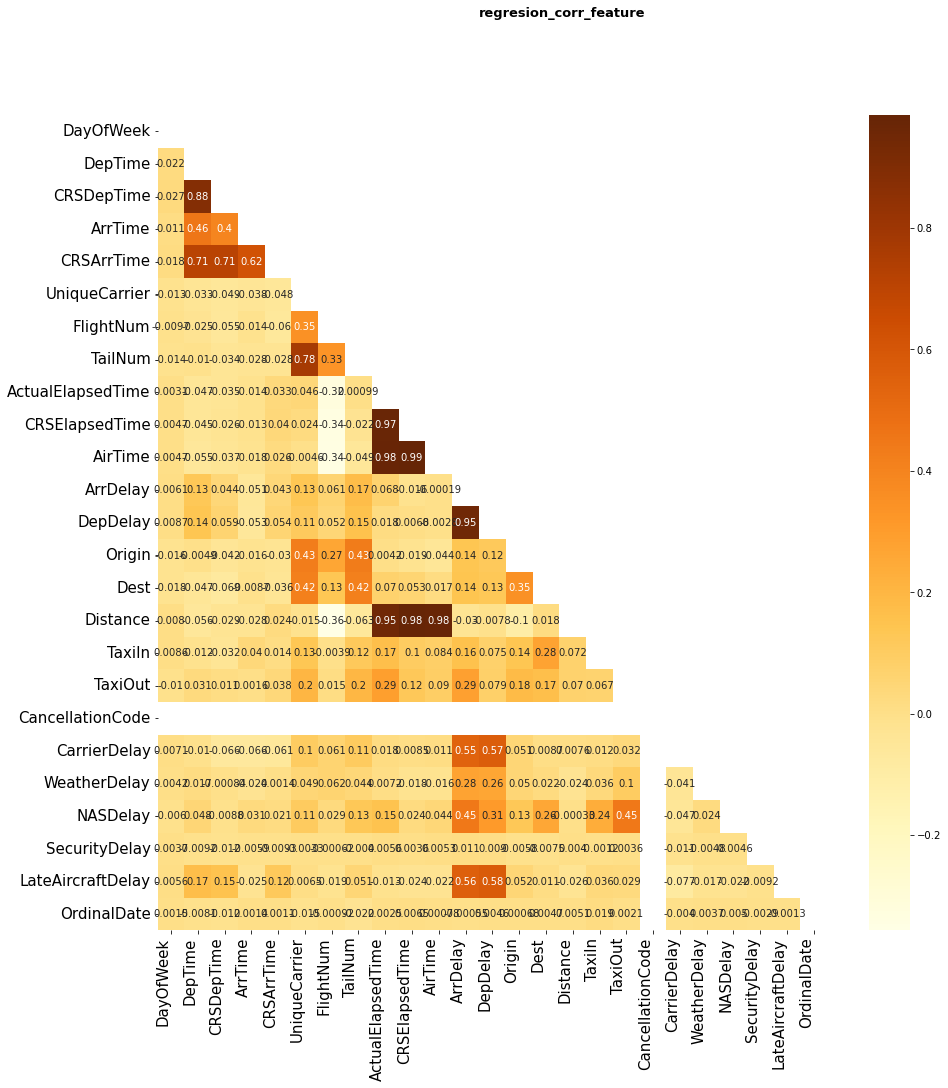

In [43]:
matrix_plot(df,"regresion_corr_feature")

The matrix plot suggest that feature with the maximum correlation with ArrDelay is DepDelay

In [44]:
#Select the numeric values 
z = df.select_dtypes(include = [np.number])
z.head() 

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate
0,4,2003,1955,2211,2225,30.087884,335,32.345312,128,150,...,810,4,8,42.199771,0,0,0,0,0,733044
1,4,754,735,1002,1000,30.087884,3231,30.708075,128,145,...,810,5,10,42.199771,0,0,0,0,0,733044
2,4,628,620,804,750,30.087884,448,27.570952,96,90,...,515,3,17,42.199771,0,0,0,0,0,733044
3,4,1829,1755,1959,1925,30.087884,3920,37.931721,90,90,...,515,3,10,42.199771,2,0,0,0,32,733044
4,4,1940,1915,2121,2110,30.087884,378,35.086957,101,115,...,688,4,10,42.199771,0,0,0,0,0,733044


In [45]:
#run the function (4) to get the Variance Inflation Factor(VIF)
vif(z)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,Variance Inflation Factor(VIF)
0,DayOfWeek,1.001828e+00
1,DepTime,5.191030e+00
2,CRSDepTime,5.110238e+00
3,ArrTime,1.724683e+00
4,CRSArrTime,2.909633e+00
5,UniqueCarrier,2.737494e+00
6,FlightNum,1.362483e+00
7,TailNum,2.691111e+00
8,ActualElapsedTime,inf
9,CRSElapsedTime,8.155258e+08


The VIF show the relation of strong linear dependency relationship between more than two variables a generally accepted value is 0-5, a value greater than 5 has a high dependency and should be avoided.

In [46]:
#do a copy of the preprocesed DF
df_v1 = df.copy()

In [47]:
#drop the features with high dependency
df.drop(columns=["CRSDepTime","ActualElapsedTime","CRSElapsedTime","AirTime",
                 "Distance","CarrierDelay"],inplace=True)

<h2> Level 1</h2>

<h3> Exercise 1 </h3>

**Create at least three different regression models to try to predict 'DelayedFlights.csv's flight delay (ArrDelay) as best as possible.**

<h4> Sampling </h4>

In [48]:
#obtain the sample size
population = data.shape[0]
sample_size = round(population/(1+population*(.05**2)))
sample_size

400

the size of the population is to large it will be 400 samples with this formula, I will take the 15% of all the size as a sample size.   

In [49]:
#new sample size
sample_size = round(df.shape[0]*.15)
sample_size

289255

In [50]:
#sample of the DF
df_sample = df.sample(n = sample_size, random_state=7)
df_sample.head()

,Date,DayOfWeek,DepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate
259237,2008-02-09,6,1810,2111,2119,47.784399,540,41.778689,-8,10,...,6,17,False,42.199771,False,0,0,0,0,733081
439183,2008-03-12,3,1746,1828,1816,45.370587,5461,43.387716,12,15,...,3,16,False,42.199771,False,0,0,0,0,733113
1505172,2008-09-26,5,2238,57,10,46.561553,791,39.579137,47,73,...,8,16,False,42.199771,False,0,0,0,47,733311
1555433,2008-10-15,3,1835,2017,2009,51.013250,6578,53.819257,8,18,...,22,14,False,42.199771,False,0,0,0,0,733330
23143,2008-01-25,5,1524,1556,1545,30.087884,2092,28.855204,11,14,...,7,9,False,42.199771,False,0,0,0,0,733066


In [51]:
#only numeric values for the sample 
x_sample = df_sample.select_dtypes(include = ['float64', 'int64'])
x_sample.head()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,TaxiIn,TaxiOut,CancellationCode,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate
259237,6,1810,2111,2119,47.784399,540,41.778689,-8,10,50.954747,48.904260,6,17,42.199771,0,0,0,0,733081
439183,3,1746,1828,1816,45.370587,5461,43.387716,12,15,33.849671,39.567537,3,16,42.199771,0,0,0,0,733113
1505172,5,2238,57,10,46.561553,791,39.579137,47,73,51.921190,43.166398,8,16,42.199771,0,0,0,47,733311
1555433,3,1835,2017,2009,51.013250,6578,53.819257,8,18,46.239568,57.075668,22,14,42.199771,0,0,0,0,733330
23143,5,1524,1556,1545,30.087884,2092,28.855204,11,14,45.598708,36.354936,7,9,42.199771,0,0,0,0,733066


<h4> Split Data </h4>

In [52]:
# Features
X = df_sample.drop(columns=['Date','ArrDelay','Cancelled','Diverted'])
X.head().T

,259237,439183,1505172,1555433,23143
DayOfWeek,6.000000,3.000000,5.000000,3.000000,5.000000
DepTime,1810.000000,1746.000000,2238.000000,1835.000000,1524.000000
ArrTime,2111.000000,1828.000000,57.000000,2017.000000,1556.000000
CRSArrTime,2119.000000,1816.000000,10.000000,2009.000000,1545.000000
UniqueCarrier,47.784399,45.370587,46.561553,51.013250,30.087884
FlightNum,540.000000,5461.000000,791.000000,6578.000000,2092.000000
TailNum,41.778689,43.387716,39.579137,53.819257,28.855204
DepDelay,10.000000,15.000000,73.000000,18.000000,14.000000
Origin,50.954747,33.849671,51.921190,46.239568,45.598708
Dest,48.904260,39.567537,43.166398,57.075668,36.354936


In [53]:
#Target
y = df_sample['ArrDelay']
y.head() 

259237     -8
439183     12
1505172    47
1555433     8
23143      11
Name: ArrDelay, dtype: int64

In [54]:
#Split set 
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1),
                                                    test_size= 0.20, random_state=17,  
                                                    shuffle = True)

In [55]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((231404, 18), (231404, 1), (57851, 18), (57851, 1))

In [56]:
#X columns
X_columns = X_train.select_dtypes(include = [np.number]).columns
X_columns= X_columns.delete(12) 
X_columns

Index(['DayOfWeek', 'DepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'DepDelay', 'Origin', 'Dest', 'TaxiIn',
       'TaxiOut', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'OrdinalDate'],
      dtype='object')

In [57]:
cols = 4
rows = math.ceil(len(X_columns)/cols)
rows

5

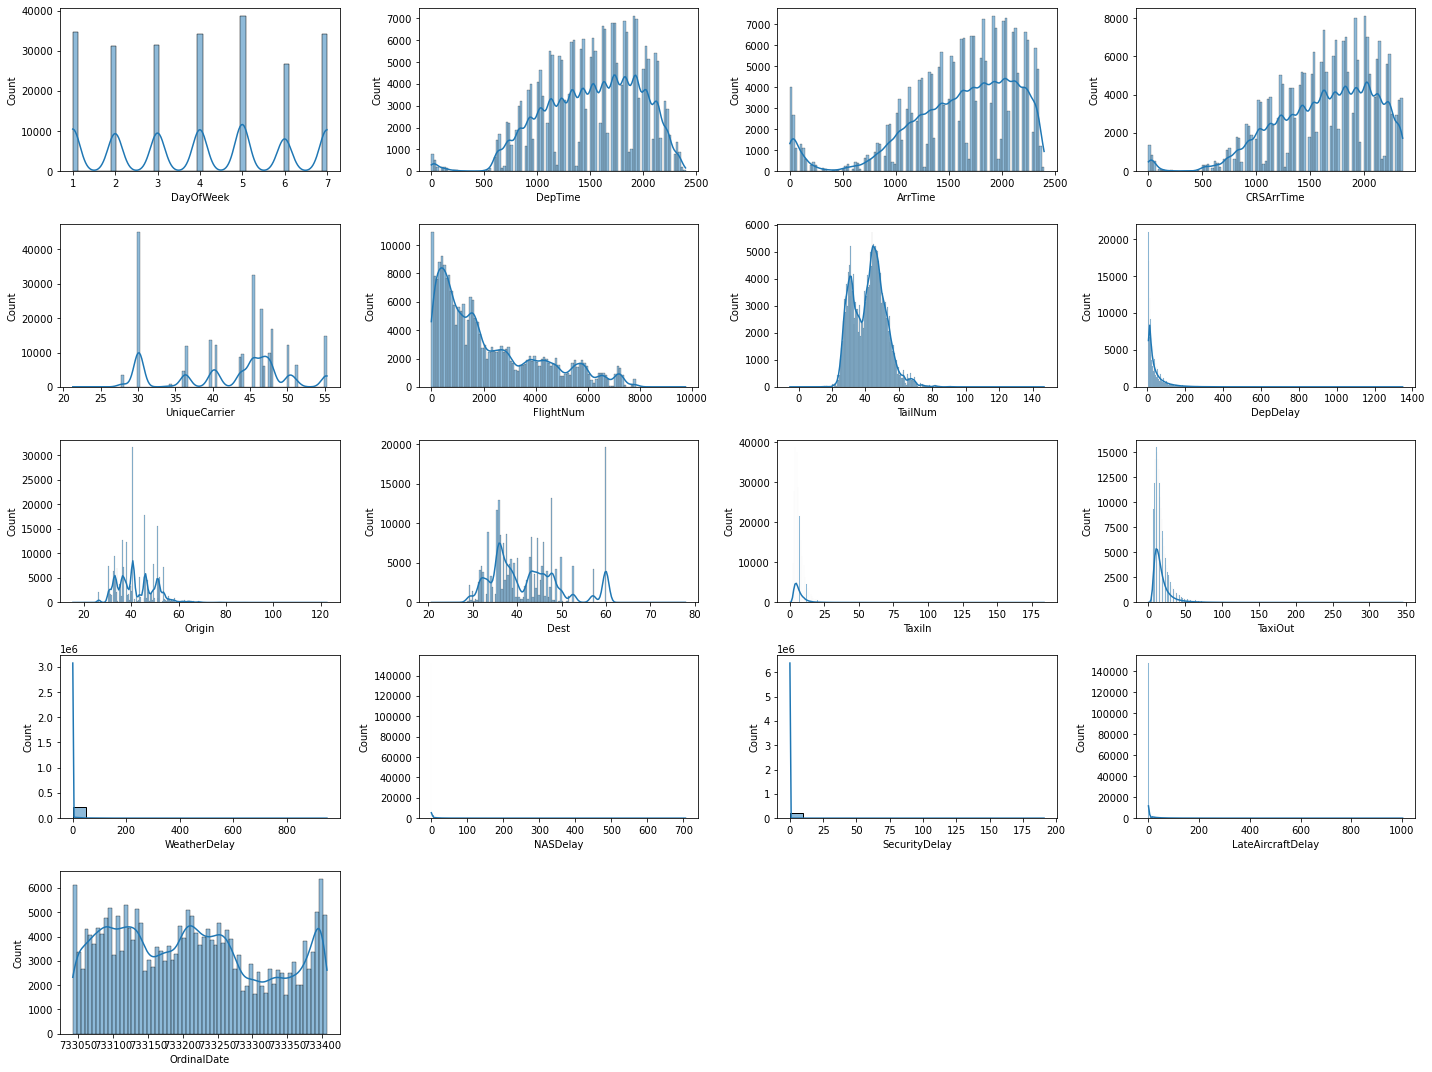

In [58]:
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in X_columns:
    plt.subplot(rows, cols, c)
    plt.xlabel(i)
    sns.histplot(x=i, data=X_train,kde=True)
    c = c + 1

plt.tight_layout()
plt.savefig("data_distribution_Xtrain.png",dpi=300)
plt.show()

The above plot show the data distribution that the data is skewed.

In [59]:
#Scale the data
scaler = StandardScaler()
X_train[X_columns] = scaler.fit_transform(X_train[X_columns])
X_test[X_columns] = scaler.fit_transform(X_test[X_columns])
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [60]:
#Linear model split
X_train_lm = X_train.copy()
X_test_lm = X_test.copy()
y_train_lm = y_train.copy() 
y_test_lm = y_test.copy()

In [61]:
#Other split
X_train_dtm = X_train.copy()
X_test_dtm = X_test.copy()
y_train_dtm = y_train.copy() 
y_test_dtm = y_test.copy()

In [62]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231404 entries, 1799388 to 529162
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DayOfWeek          231404 non-null  float64
 1   DepTime            231404 non-null  float64
 2   ArrTime            231404 non-null  float64
 3   CRSArrTime         231404 non-null  float64
 4   UniqueCarrier      231404 non-null  float64
 5   FlightNum          231404 non-null  float64
 6   TailNum            231404 non-null  float64
 7   DepDelay           231404 non-null  float64
 8   Origin             231404 non-null  float64
 9   Dest               231404 non-null  float64
 10  TaxiIn             231404 non-null  float64
 11  TaxiOut            231404 non-null  float64
 12  CancellationCode   231404 non-null  float64
 13  WeatherDelay       231404 non-null  float64
 14  NASDelay           231404 non-null  float64
 15  SecurityDelay      231404 non-null  float64
 

<h4> Multiple Linear Regression</h4>

In [63]:
X_train_lm = sm.add_constant(X_train_lm, prepend=True)
m1_MLR = sm.OLS(endog=y_train_lm, exog=X_train_lm)
m1_MLR = m1_MLR.fit()
predictions = m1_MLR.predict(X_train_lm)
print(m1_MLR.summary())

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 3.808e+05
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        21:52:56   Log-Likelihood:                 61167.
No. Observations:              231404   AIC:                        -1.223e+05
Df Residuals:                  231386   BIC:                        -1.221e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
DayOfWeek            -0.0009      0.00

In [64]:
columns = ["CancellationCode"]
X_train_lm = X_train_lm.drop(columns=columns)
X_test_lm = X_test.drop(columns=columns)

In [65]:
X_train_lm = sm.add_constant(X_train_lm, prepend=True)
m1_MLR = sm.OLS(endog=y_train, exog=X_train_lm,)
m1_MLR = m1_MLR.fit()
print(m1_MLR.summary())

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 3.808e+05
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        21:52:56   Log-Likelihood:                 61167.
No. Observations:              231404   AIC:                        -1.223e+05
Df Residuals:                  231386   BIC:                        -1.221e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.128e-15      0.00

The R^2 show that the model can predict the 96.5% of the values. Its too good, so the model will likely be overfitting or as the distribution shows, is a polynomial curve and a regresion line is not the adecuade model. 

 the function can be constructed with the coef, the constant is the slope of the curve and the rest are the coefficients for e.g: **f(x) =  1.128e-15  - 0.0009 x_1 - 0.0009 x_2 + 0.0060x_3 ...**


In [66]:
#add the constant and predict the y values
X_test_lm = sm.add_constant(X_test_lm, prepend=True)
m1_MLR_prediction = m1_MLR.predict(X_test_lm)

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
y_test_df = pd.DataFrame(y_test_lm,index=m1_MLR_prediction.index,columns=["Actual"]) 
y_test_df

,Actual
711656,0.307919
384138,-0.013736
346319,0.164961
1167160,-0.567697
522603,-0.478348
...,...
308041,-0.746394
442503,-0.049475
1619804,-0.049475
1188181,-0.549827


In [68]:
#unscaled the y values
y_test_unscaled = scaler.inverse_transform(y_test_df)
y_test_unscaled_df = pd.DataFrame(y_test_unscaled,columns=["Actual"],index=y_test_df.index)
y_test_unscaled_df

,Actual
711656,59.0
384138,41.0
346319,51.0
1167160,10.0
522603,15.0
...,...
308041,0.0
442503,39.0
1619804,39.0
1188181,11.0


In [69]:
#unscaled the predicted values
m1_mlr_predic_unscaled = scaler.inverse_transform(m1_MLR_prediction)
m1_mlr_predic_unscaled_df= pd.DataFrame(m1_mlr_predic_unscaled,columns=["Predicted"],
                                        index=y_test_df.index)
m1_mlr_predic_unscaled_df


,Predicted
711656,68.253531
384138,42.524496
346319,64.446543
1167160,17.544603
522603,6.598845
...,...
308041,8.289730
442503,48.875412
1619804,56.722928
1188181,6.188481


In [70]:
#concat the actual and predicted DF
m1_predicted_actual_df = pd.concat([y_test_unscaled_df,m1_mlr_predic_unscaled_df],axis=1)
m1_predicted_actual_df

,Actual,Predicted
711656,59.0,68.253531
384138,41.0,42.524496
346319,51.0,64.446543
1167160,10.0,17.544603
522603,15.0,6.598845
...,...,...
308041,0.0,8.289730
442503,39.0,48.875412
1619804,39.0,56.722928
1188181,11.0,6.188481


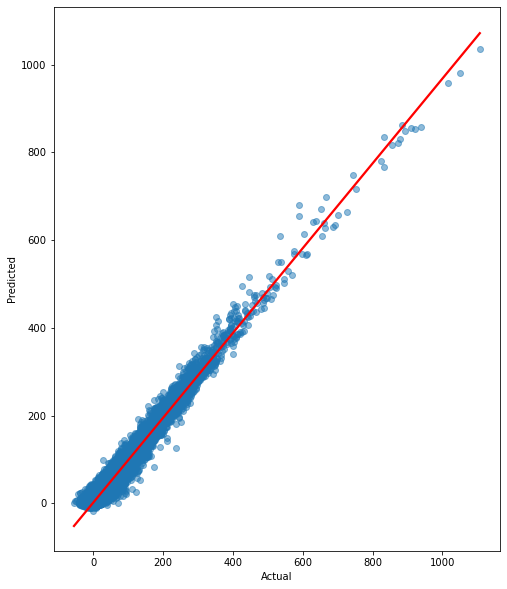

In [71]:
fig = plt.subplots(figsize=(8,10))
fig = sns.regplot(x="Actual", y="Predicted", data=m1_predicted_actual_df, 
                  line_kws={"color": "red"},scatter_kws={'alpha':0.5})
plt.show()

The plot show that the linear model can predict the ArrDelay with precision, the plot doesn't show a overfiting model. The model cannot predict the last part of the data as we saw in the qqplot the data distribution has a skew.       

<h4>Decision Tree Regression</h4>

In [72]:
#model creation
DTR_model = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 17
          ).fit(X_train_dtm, y_train)

Profundidad del árbol: 4
Número de nodos terminales: 16


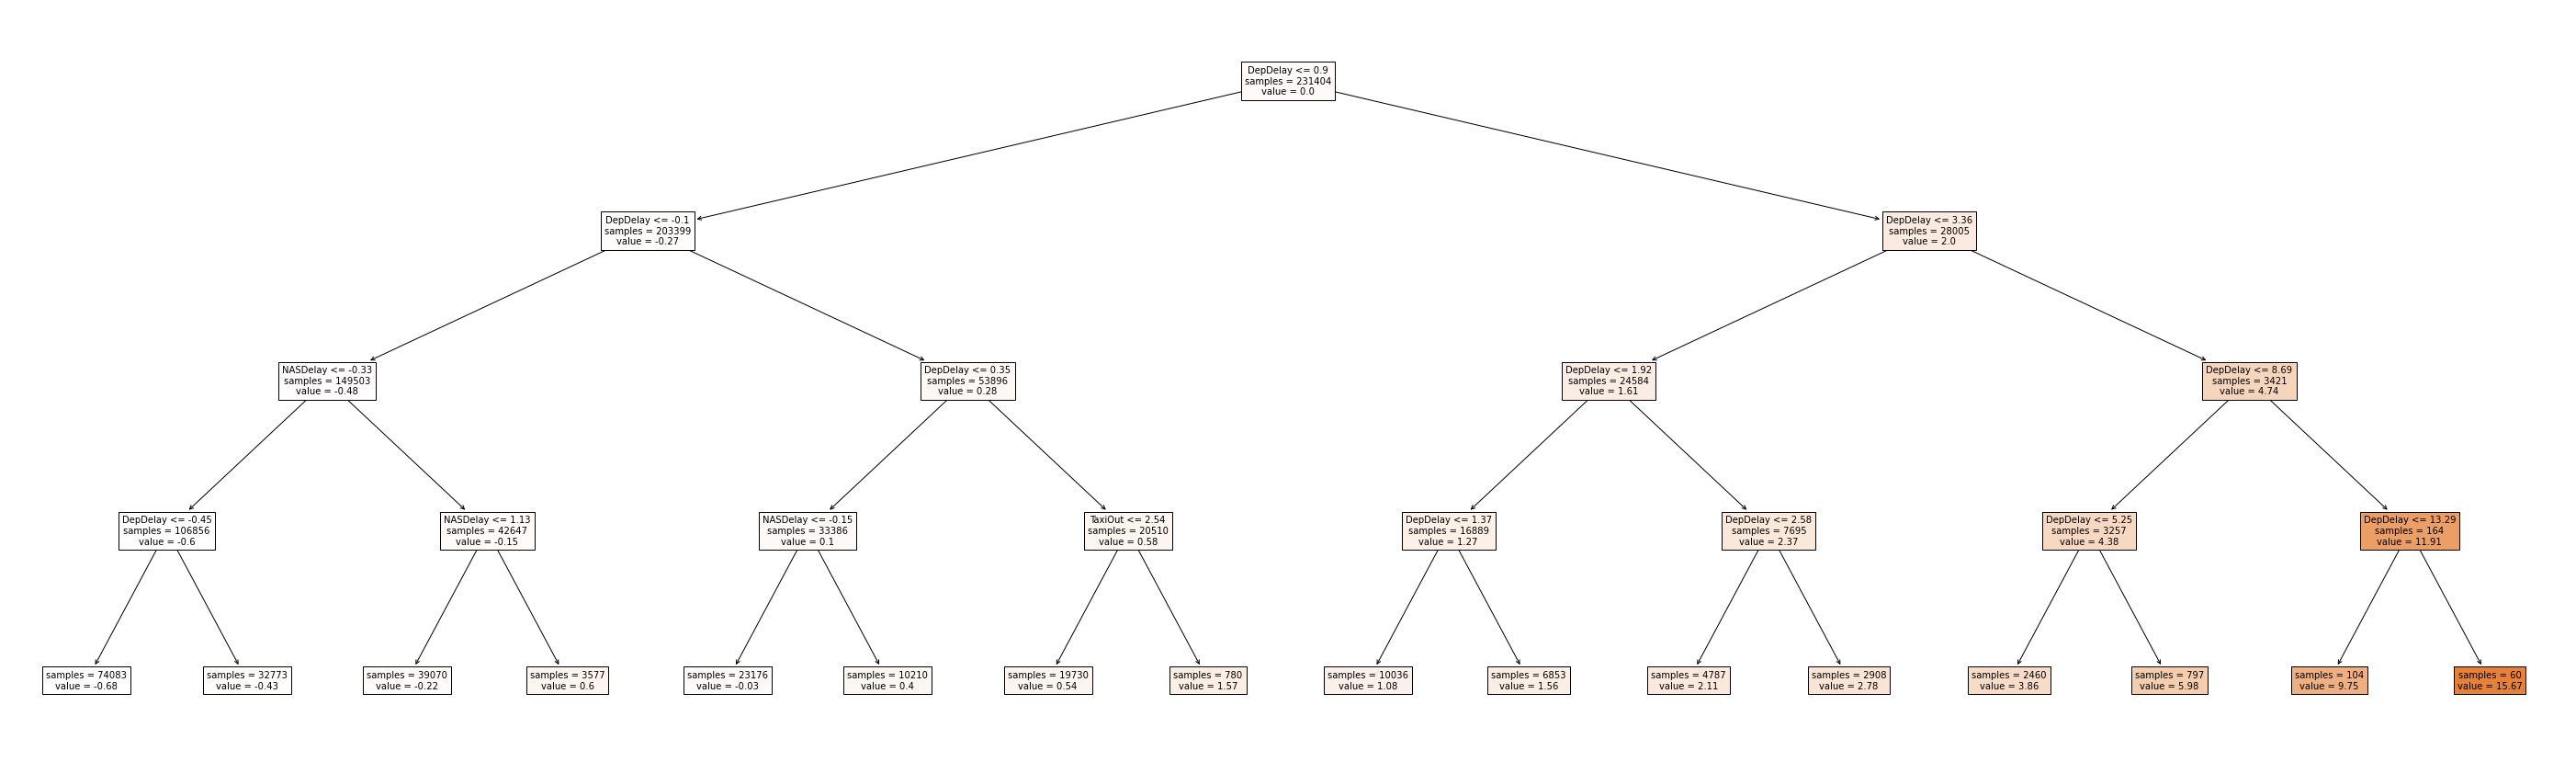

In [73]:
# structure of the decision tree
fig, ax = plt.subplots(figsize=(50 ,15))

print(f"Profundidad del árbol: {DTR_model.get_depth()}")
print(f"Número de nodos terminales: {DTR_model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = DTR_model,
            feature_names = X_train_dtm.columns,
            class_names   = 'ArrDelay',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [74]:
#the decision tree as text
DTR_model_text = export_text(
                    decision_tree = DTR_model,
                    feature_names = list(X_train_dtm.columns)
               )
print(DTR_model_text)

|--- DepDelay <= 0.90
|   |--- DepDelay <= -0.10
|   |   |--- NASDelay <= -0.33
|   |   |   |--- DepDelay <= -0.45
|   |   |   |   |--- value: [-0.68]
|   |   |   |--- DepDelay >  -0.45
|   |   |   |   |--- value: [-0.43]
|   |   |--- NASDelay >  -0.33
|   |   |   |--- NASDelay <= 1.13
|   |   |   |   |--- value: [-0.22]
|   |   |   |--- NASDelay >  1.13
|   |   |   |   |--- value: [0.60]
|   |--- DepDelay >  -0.10
|   |   |--- DepDelay <= 0.35
|   |   |   |--- NASDelay <= -0.15
|   |   |   |   |--- value: [-0.03]
|   |   |   |--- NASDelay >  -0.15
|   |   |   |   |--- value: [0.40]
|   |   |--- DepDelay >  0.35
|   |   |   |--- TaxiOut <= 2.54
|   |   |   |   |--- value: [0.54]
|   |   |   |--- TaxiOut >  2.54
|   |   |   |   |--- value: [1.57]
|--- DepDelay >  0.90
|   |--- DepDelay <= 3.36
|   |   |--- DepDelay <= 1.92
|   |   |   |--- DepDelay <= 1.37
|   |   |   |   |--- value: [1.08]
|   |   |   |--- DepDelay >  1.37
|   |   |   |   |--- value: [1.56]
|   |   |--- DepDelay >  1.9

In [75]:
#importance of the predictors
predictors_importance = pd.DataFrame(
                            {'Predictor': X_train_dtm.columns,
                             'Importance': DTR_model.feature_importances_}
                            )
predictors_importance.sort_values('Importance', ascending=False)

,Predictor,Importance
7,DepDelay,0.951285
14,NASDelay,0.045035
11,TaxiOut,0.003680
0,DayOfWeek,0.000000
10,TaxiIn,0.000000
16,LateAircraftDelay,0.000000
15,SecurityDelay,0.000000
13,WeatherDelay,0.000000
12,CancellationCode,0.000000
9,Dest,0.000000


The most relevant Feature is DepDelay with 95,12% of participation for the prediction. 

In [76]:
# Pruning by crossvalidation
 
param_grid = {'ccp_alpha':np.linspace(0, 100, 10)}


grid = GridSearchCV(

        estimator = DecisionTreeRegressor(
                            max_depth         = 4,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 17
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_dtm, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=4, random_state=17),
             param_grid={'ccp_alpha': array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])},
             return_train_score=True)

In [77]:
grid.best_params_

{'ccp_alpha': 0.0}


Tree Depth: 4
Number of terminal nodes: 16


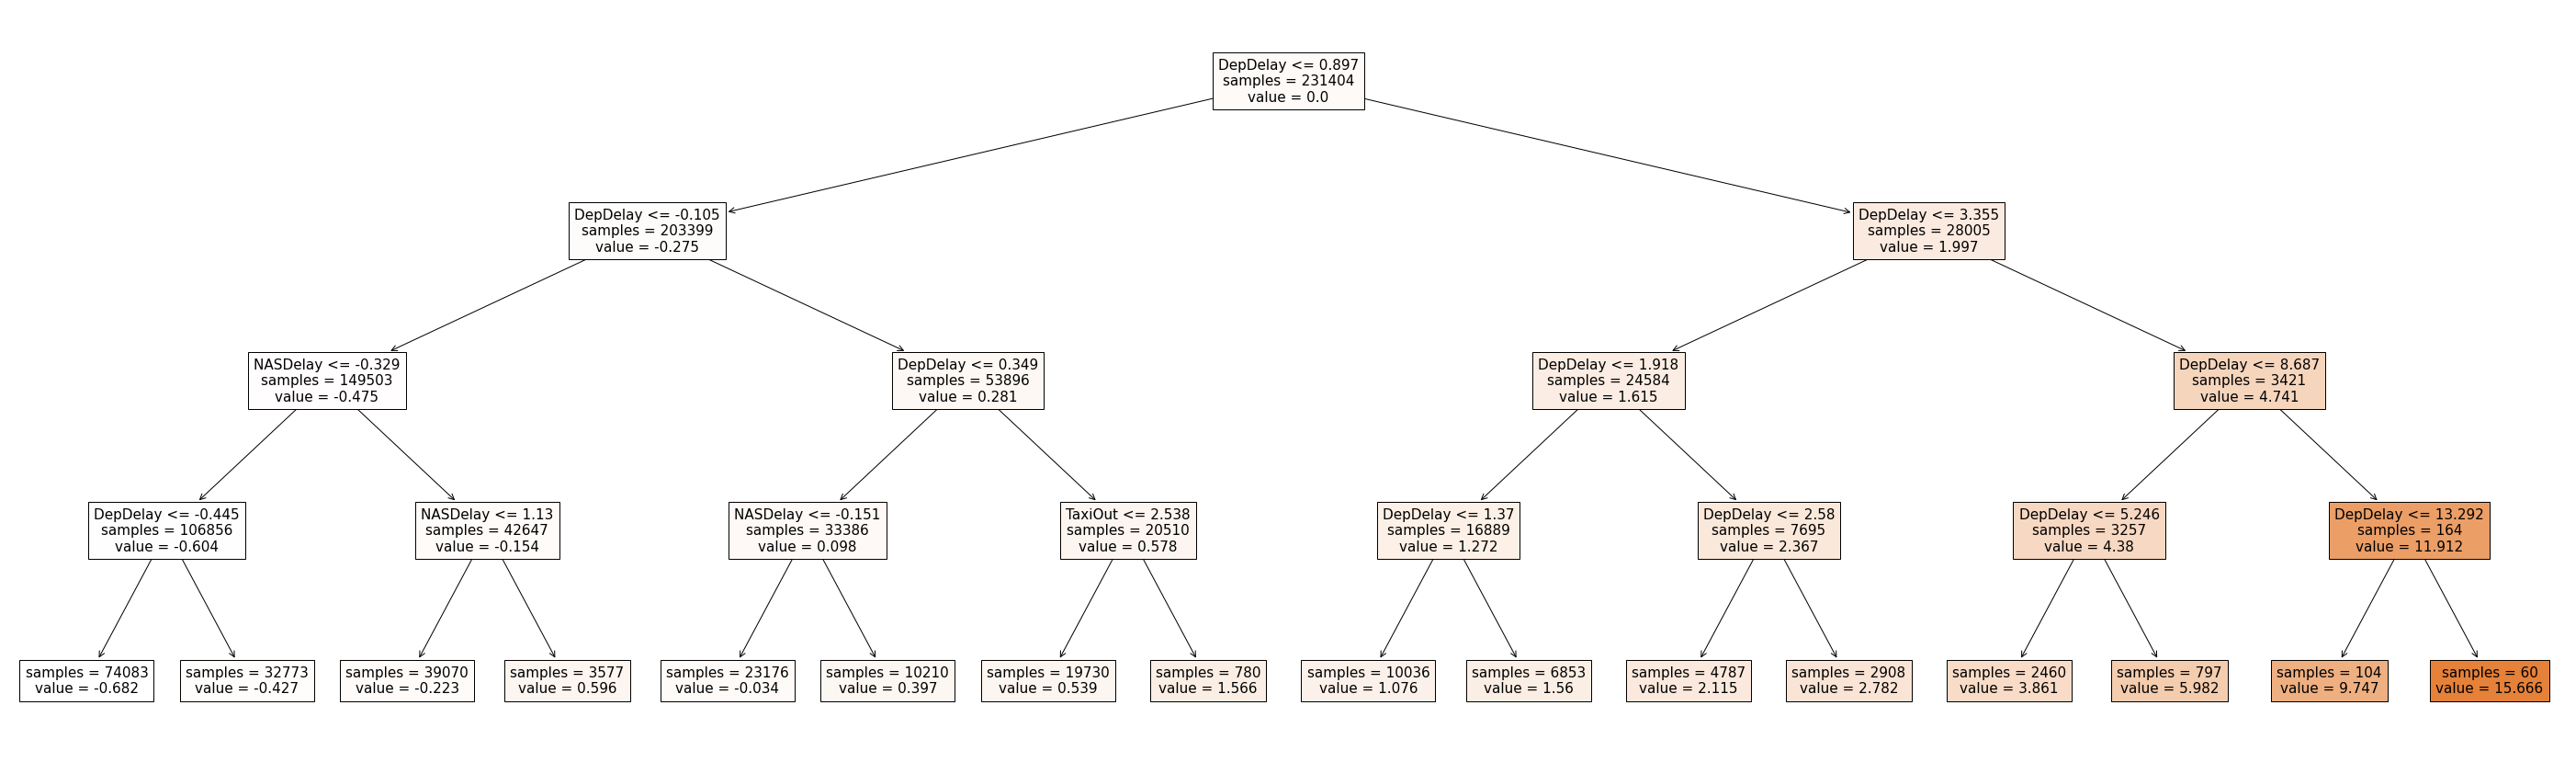

In [78]:
#dinal model with the best estimator
DTR_final_model = grid.best_estimator_
print()
print(f"Tree Depth: {DTR_final_model.get_depth()}")
print(f"Number of terminal nodes: {DTR_final_model.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(50 ,15))
plot = plot_tree(
            decision_tree = DTR_final_model,
            feature_names = X_train_dtm.columns,
            class_names   = 'ArrDelay',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [79]:
initial_predictions = DTR_model.predict(X = X_test_dtm)

rmse = mean_squared_error(
        y_true  = y_test_dtm,
        y_pred  = initial_predictions,
        squared = False
       )
print("RMSE error:  {}".format(rmse))

RMSE error:  0.26803259111028105


In [80]:
#final prediction
final_predictions = DTR_final_model.predict(X = X_test_dtm)
final_predictions

array([ 0.3974182 , -0.03390031,  0.53932985, ...,  0.53932985,
       -0.68154148, -0.03390031])

In [81]:
#unscale the prediction and create a DF  
dtr_predic_unscaled_df= pd.DataFrame(final_predictions,columns=["Predicted ArrDelay"],
                                     index=y_test_df.index)
dtr_predic_unscaled_df

,Predicted ArrDelay
711656,0.397418
384138,-0.033900
346319,0.539330
1167160,-0.681541
522603,-0.222507
...,...
308041,-0.681541
442503,-0.033900
1619804,0.539330
1188181,-0.681541


In [82]:
final_predicciones = DTR_final_model.predict(X = X_test_dtm)
rmse = mean_squared_error(
        y_true  = y_test_dtm,
        y_pred  = final_predicciones,
        squared = False
       )
print("RMSE error: {}".format(rmse))

RMSE error: 0.26803259111028105


In [83]:
m2_predicted_actual_df = pd.concat([y_test_unscaled_df,dtr_predic_unscaled_df],axis=1)
m2_predicted_actual_df

,Actual,Predicted ArrDelay
711656,59.0,0.397418
384138,41.0,-0.033900
346319,51.0,0.539330
1167160,10.0,-0.681541
522603,15.0,-0.222507
...,...,...
308041,0.0,-0.681541
442503,39.0,-0.033900
1619804,39.0,0.539330
1188181,11.0,-0.681541


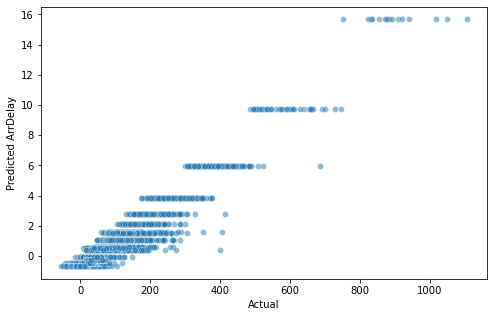

In [84]:
#use the function (8) to plot 
plot_predictions(m2_predicted_actual_df,"Actual","Predicted ArrDelay") 

The Decision Tree model has a better prediction of the skewed values than the linear model in the final part of the graph a greater number of predictions are observed. 

<h4>Random Forest</h4>

In [85]:
#Creation of the model
RF_model = RandomForestRegressor(n_estimators = 10, random_state = 21)
RF_model.fit(X_train_dtm, y_train_dtm)

/var/folders/sq/fggxzcn90p73_7hm62_tglm40000gn/T/ipykernel_2162/2216274761.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train_dtm, y_train_dtm)


RandomForestRegressor(n_estimators=10, random_state=21)

In [86]:
#prediction of the values
rf_predictions = RF_model.predict(X_test_dtm)
rf_predictions

array([ 0.28789333,  0.07694979,  0.19748895, ..., -0.02054513,
       -0.60196934,  0.10708458])

In [87]:
#unscale the values
rf_predic_unscaled_df= pd.DataFrame(rf_predictions,columns=["Predicted ArrDelay"],
                                    index=y_test_df.index)
rf_predic_unscaled_df

,Predicted ArrDelay
711656,0.287893
384138,0.076950
346319,0.197489
1167160,-0.740235
522603,-0.481430
...,...
308041,-0.704782
442503,-0.047135
1619804,-0.020545
1188181,-0.601969


In [88]:
rf_predictions_df = pd.concat([y_test_df,rf_predic_unscaled_df],axis=1)
rf_predictions_df

,Actual,Predicted ArrDelay
711656,0.307919,0.287893
384138,-0.013736,0.076950
346319,0.164961,0.197489
1167160,-0.567697,-0.740235
522603,-0.478348,-0.481430
...,...,...
308041,-0.746394,-0.704782
442503,-0.049475,-0.047135
1619804,-0.049475,-0.020545
1188181,-0.549827,-0.601969


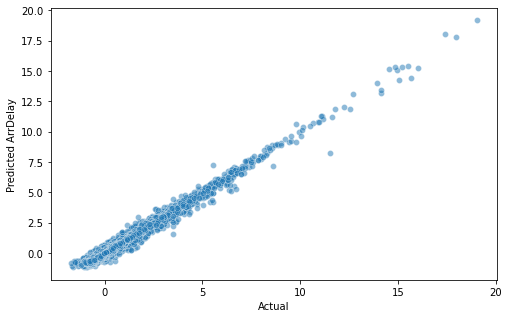

In [89]:
#use the function (8) to plot 
plot_predictions(rf_predictions_df,"Actual","Predicted ArrDelay") 

The plot shows a better fit of the model, the base is more thin and more skewed values are predicted.  

<h4>Neural Network</h4>

In [90]:
#creation of the model and predict the values
nn_model = MLPRegressor(random_state=10, max_iter=500).fit(X_train_dtm, y_train_dtm)
nn_model_pred = nn_model.predict(X_test_dtm)
nn_model_pred 

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ 0.35856113,  0.02318182,  0.1736596 , ...,  0.0871411 ,
       -0.48461712,  0.23341822])

In [91]:
#scale the values 
nn_predic_unscaled_df= pd.DataFrame(nn_model_pred,columns=["Predicted ArrDelay"],
                                    index=y_test_df.index)
nn_predic_unscaled_df  

,Predicted ArrDelay
711656,0.358561
384138,0.023182
346319,0.173660
1167160,-0.587294
522603,-0.392918
...,...
308041,-0.569088
442503,-0.008480
1619804,0.087141
1188181,-0.484617


In [92]:
nn_predictions_df = pd.concat([y_test_df,nn_predic_unscaled_df],axis=1)
nn_predictions_df

,Actual,Predicted ArrDelay
711656,0.307919,0.358561
384138,-0.013736,0.023182
346319,0.164961,0.173660
1167160,-0.567697,-0.587294
522603,-0.478348,-0.392918
...,...,...
308041,-0.746394,-0.569088
442503,-0.049475,-0.008480
1619804,-0.049475,0.087141
1188181,-0.549827,-0.484617


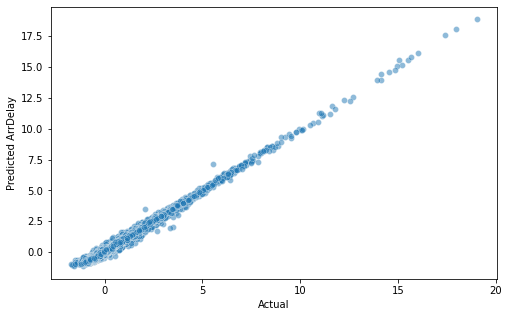

In [93]:
#use the function (8) to plot 
plot_predictions(nn_predictions_df,"Actual","Predicted ArrDelay") 

The neural network shows a better fit the data distribution as a line is better, there is less gap in the predicted model.   

<h3> Exercise 2 </h3>

Compare them based on MSE and R2.

In [94]:
#run the function (7) to obtain the metrics
mlm_r2, mlm_mse = comparation_model("Multiple Linear Model:",m1_mlr_predic_unscaled)

Multiple Linear Model:
Coefficient of determination(R^2): -4665.667390591333
Mean Squared Error (MSE): 4666.667390591335
Root Mean Squared Error (RMSE): 68.31301040498315
Mean Absolute Error (MAE): 41.93712004359704


In [96]:
#run the function (7) to obtain the metrics
dtrm_r2, dtrm_mse = comparation_model("Decision Tree Regression Model:",final_predictions)

Decision Tree Regression Model:
Coefficient of determination(R^2): 0.9281585301027089
Mean Squared Error (MSE): 0.07184146989729111
Root Mean Squared Error (RMSE): 0.26803259111028105
Mean Absolute Error (MAE): 0.17849569995512415


In [98]:
#run the function (7) to obtain the metrics
rfm_r2, rfm_mse = comparation_model("Random Forest Model:",rf_predictions)

Random Forest Model:
Coefficient of determination(R^2): 0.9845754476722047
Mean Squared Error (MSE): 0.01542455232779527
Root Mean Squared Error (RMSE): 0.12419562121023135
Mean Absolute Error (MAE): 0.0791583321841343


In [99]:
#run the function (7) to obtain the metrics
nnm_r2, nnm_mse = comparation_model("Neural Network Model:",nn_model_pred)

Neural Network Model:
Coefficient of determination(R^2): 0.9852637527052345
Mean Squared Error (MSE): 0.01473624729476552
Root Mean Squared Error (RMSE): 0.12139294581962133
Mean Absolute Error (MAE): 0.09178456627691355


In [100]:
metrics_dic = { "R2": [mlm_r2,dtrm_r2,rfm_r2,nnm_r2],
              "MSE": [mlm_mse,dtrm_mse,rfm_mse,nnm_mse] }

metric_models_df = pd.DataFrame(metrics_dic, index =['MLM',
                                'DTRM',
                                'RFM',
                                'NN'])
metric_models_df

,R2,MSE
MLM,-4665.667391,4666.667391
DTRM,0.928159,0.071841
RFM,0.984575,0.015425
NN,0.985264,0.014736


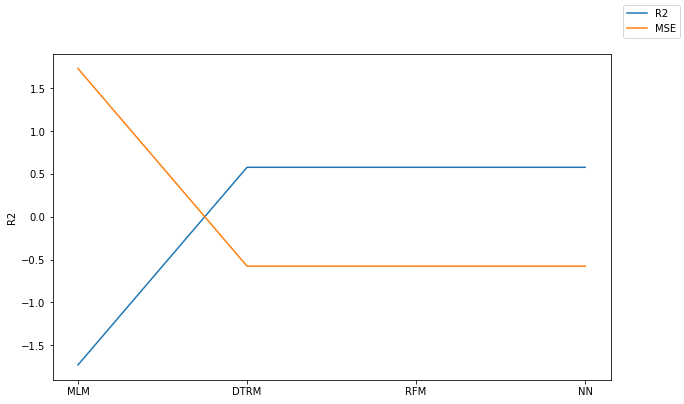

In [101]:
#Scale and plot the metrics 
scaledMetrics_models = pd.DataFrame(scaler.fit_transform(metric_models_df),index =['MLM',
                                'DTRM',
                                'RFM',
                                'NN'], columns=["R2","MSE"])
scaledMetrics_models

fig = plt.figure(figsize=(10,6))
sns.lineplot(x= scaledMetrics_models.index, y="R2", data= scaledMetrics_models)
sns.lineplot(x= scaledMetrics_models.index, y="MSE", data= scaledMetrics_models)
fig.legend(labels=["R2","MSE"])
plt.show()

The plot of the metric shows that the NN model has a better fit and less error the second best is the RF model with a less accuracy, the third is the ML model and the last is the DT model.  

<h3> Exercise 3 </h3>

Train them using the different parameters they support.

<h4>Multiple Linear Regression</h4>

The StatModel library doesn't have aditional parameters

<h4>Decision Tree Regression</h4>

In [102]:
#Create the model with an initial ccp_alpha value
DTR_model_v2 = DecisionTreeRegressor(
            max_depth         = 7,
            random_state      = 17,
            ccp_alpha=0.1
          ).fit(X_train_dtm, y_train)

Tree Depth: 2
Number of terminal nodes: 3


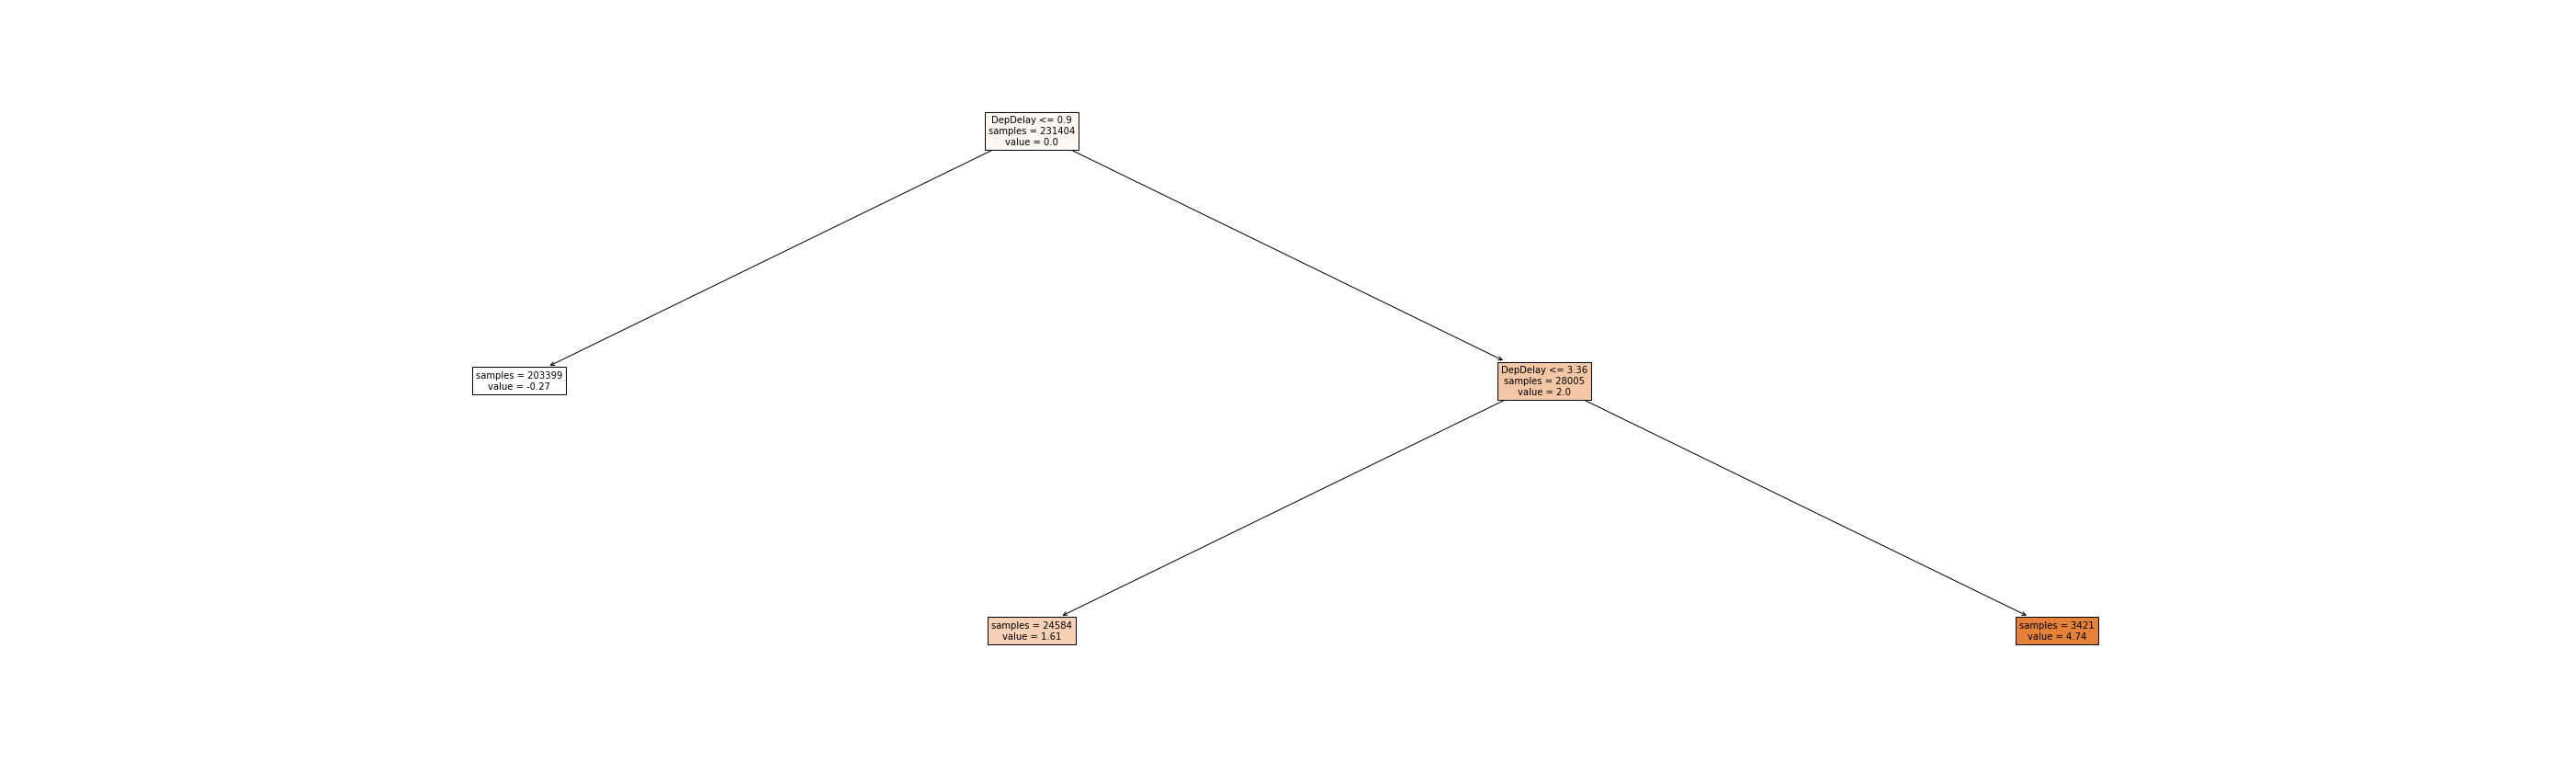

In [103]:
fig, ax = plt.subplots(figsize=(50 ,15))

print(f"Tree Depth: {DTR_model_v2.get_depth()}")
print(f"Number of terminal nodes: {DTR_model_v2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = DTR_model_v2,
            feature_names = X_train_dtm.columns,
            class_names   = 'ArrDelay',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [104]:
#predict the importance
predictors_importance = pd.DataFrame(
                            {'Predictor': X_train_dtm.columns,
                             'Importance': DTR_model_v2.feature_importances_}
                            )
predictors_importance.sort_values('Importance', ascending=False)

,Predictor,Importance
7,DepDelay,1.0
0,DayOfWeek,0.0
10,TaxiIn,0.0
16,LateAircraftDelay,0.0
15,SecurityDelay,0.0
14,NASDelay,0.0
13,WeatherDelay,0.0
12,CancellationCode,0.0
11,TaxiOut,0.0
9,Dest,0.0


In [105]:
#search the best ccp_alpha
param_grid = {'ccp_alpha':np.linspace(0, 100, 10)}

grid = GridSearchCV(
        estimator = DecisionTreeRegressor(
                            max_depth         = 4,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 17
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_dtm, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=4, random_state=17),
             param_grid={'ccp_alpha': array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])},
             return_train_score=True)

In [106]:
grid.best_params_

{'ccp_alpha': 0.0}


Tree Depth: 4
Number of terminal nodes: 16


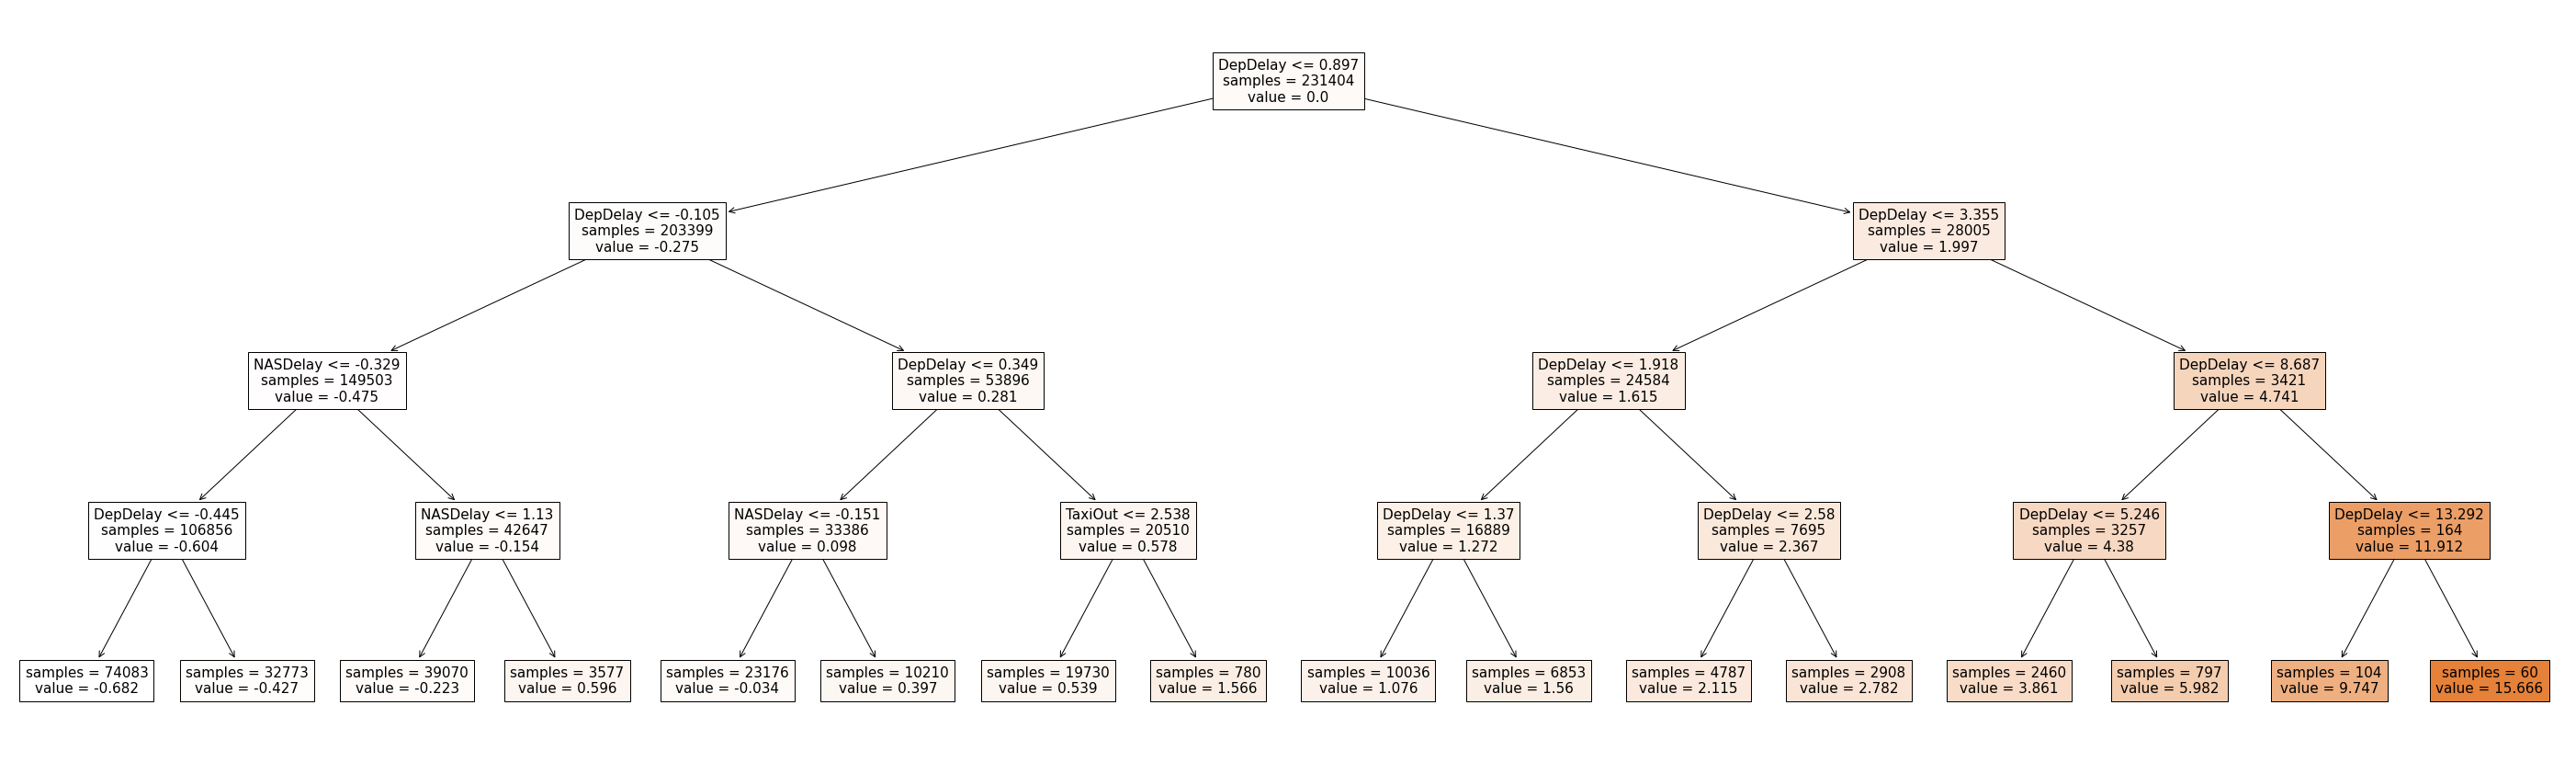

In [107]:
DTR_final_model_v2 = grid.best_estimator_
print()
print(f"Tree Depth: {DTR_final_model_v2.get_depth()}")
print(f"Number of terminal nodes: {DTR_final_model_v2.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(50 ,15))
plot = plot_tree(
            decision_tree = DTR_final_model_v2,
            feature_names = X_train_dtm.columns,
            class_names   = 'ArrDelay',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [108]:
#final predictions and unscaled values
final_predictions_v2 = DTR_final_model_v2.predict(X_test_dtm)
final_predictions_v2
#df_final_predictions_v2 = pd.DataFrame(final_predictions_v2)
#df_final_predictions_v2

array([ 0.3974182 , -0.03390031,  0.53932985, ...,  0.53932985,
       -0.68154148, -0.03390031])

In [109]:
#unscaled values
#dtr_predic_unscaled = scaler.inverse_transform(final_predictions_v2)
final_predictions_df_v2 = pd.DataFrame(final_predictions_v2,
                                    columns=["Predicted ArrDelay"],
                                   index=y_test_df.index)
final_predictions_df_v2

,Predicted ArrDelay
711656,0.397418
384138,-0.033900
346319,0.539330
1167160,-0.681541
522603,-0.222507
...,...
308041,-0.681541
442503,-0.033900
1619804,0.539330
1188181,-0.681541


In [110]:
initial_predictions_v2 = DTR_model_v2.predict(X = X_test_dtm)

rmse = mean_squared_error(
        y_true  = y_test_dtm,
        y_pred  = initial_predictions_v2,
        squared = False
       )
print("RMSE error: {}".format(rmse))

RMSE error: 0.5706815413634295


In [111]:
#Final predictions and unscale 
final_predicciones_v2 = DTR_final_model_v2.predict(X = X_test_dtm)
#dtr_final_predic_unscaled_v2 = scaler.inverse_transform(final_predicciones_v2)
dtr_final_predictions_df_v2 = pd.DataFrame(final_predicciones_v2,
                                    columns=["Predicted ArrDelay"],
                                   index=y_test_df.index)

In [112]:
m2_predicted_actual_df_v2 = pd.concat([y_test_df,dtr_final_predictions_df_v2],axis=1)
m2_predicted_actual_df_v2

,Actual,Predicted ArrDelay
711656,0.307919,0.397418
384138,-0.013736,-0.033900
346319,0.164961,0.539330
1167160,-0.567697,-0.681541
522603,-0.478348,-0.222507
...,...,...
308041,-0.746394,-0.681541
442503,-0.049475,-0.033900
1619804,-0.049475,0.539330
1188181,-0.549827,-0.681541


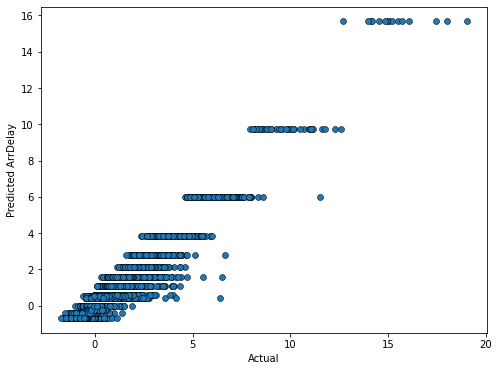

In [113]:
fig = plt.subplots(figsize=(8,6))
sns.scatterplot(x="Actual",y="Predicted ArrDelay",data=m2_predicted_actual_df_v2,
                edgecolor='k',linewidth=.5)
plt.show()

There is not difference in the plot.   

<h4>Random Forest</h4>

In [114]:
RF_model_v2 = RandomForestRegressor(n_estimators = 120, 
                                 random_state = 21,
                                 n_jobs= -1)
RF_model_v2.fit(X_train_dtm, y_train_dtm)

/var/folders/sq/fggxzcn90p73_7hm62_tglm40000gn/T/ipykernel_2162/1783723290.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_v2.fit(X_train_dtm, y_train_dtm)


RandomForestRegressor(n_estimators=120, n_jobs=-1, random_state=21)

In [115]:
rf_predictions_v2 = RF_model_v2.predict(X_test_dtm)
rf_predictions_v2

array([ 0.28420034, -0.01005704,  0.21432898, ..., -0.01759073,
       -0.6198434 ,  0.10605054])

In [116]:
#rf_predic_unscaled_v2 = scaler.inverse_transform(rf_predictions_v2)
rf_predictions_df_v2 = pd.DataFrame(rf_predictions_v2,
                                    columns=["Predicted ArrDelay"],
                                   index=y_test_df.index)
rf_predictions_df_v2

,Predicted ArrDelay
711656,0.284200
384138,-0.010057
346319,0.214329
1167160,-0.696953
522603,-0.481430
...,...
308041,-0.637422
442503,-0.022761
1619804,-0.017591
1188181,-0.619843


In [117]:
rf_predictions_df_v2 = pd.concat([y_test_df,rf_predictions_df_v2],axis=1)
rf_predictions_df_v2

,Actual,Predicted ArrDelay
711656,0.307919,0.284200
384138,-0.013736,-0.010057
346319,0.164961,0.214329
1167160,-0.567697,-0.696953
522603,-0.478348,-0.481430
...,...,...
308041,-0.746394,-0.637422
442503,-0.049475,-0.022761
1619804,-0.049475,-0.017591
1188181,-0.549827,-0.619843


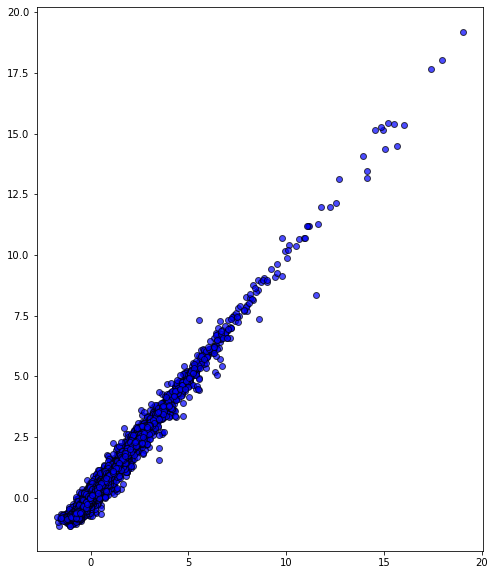

In [118]:
fig = plt.subplots(figsize=(8,10))
plt.plot(y_test_dtm , rf_predictions_v2, 'bo', alpha= .7, mec="k")
plt.show()

There is not difference in the plot.

<h4>Neural Network</h4>

In [119]:
nn_model_v2 = MLPRegressor(random_state=10, max_iter=500,
                       activation="logistic").fit(X_train_dtm, y_train_dtm)
nn_model_pred_v2 = nn_model.predict(X_test_dtm)
nn_model_pred_v2

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([ 0.35856113,  0.02318182,  0.1736596 , ...,  0.0871411 ,
       -0.48461712,  0.23341822])

In [120]:
nn_prediction_df_v2 = pd.DataFrame(nn_model_pred_v2  ,
                                columns=["Predicted ArrDelay"],
                               index=X_test_dtm.index)
nn_prediction_df_v2

,Predicted ArrDelay
711656,0.358561
384138,0.023182
346319,0.173660
1167160,-0.587294
522603,-0.392918
...,...
308041,-0.569088
442503,-0.008480
1619804,0.087141
1188181,-0.484617


In [121]:
nn_predictions_df_v2 = pd.concat([y_test_df,nn_prediction_df_v2],axis=1)
nn_predictions_df_v2

,Actual,Predicted ArrDelay
711656,0.307919,0.358561
384138,-0.013736,0.023182
346319,0.164961,0.173660
1167160,-0.567697,-0.587294
522603,-0.478348,-0.392918
...,...,...
308041,-0.746394,-0.569088
442503,-0.049475,-0.008480
1619804,-0.049475,0.087141
1188181,-0.549827,-0.484617


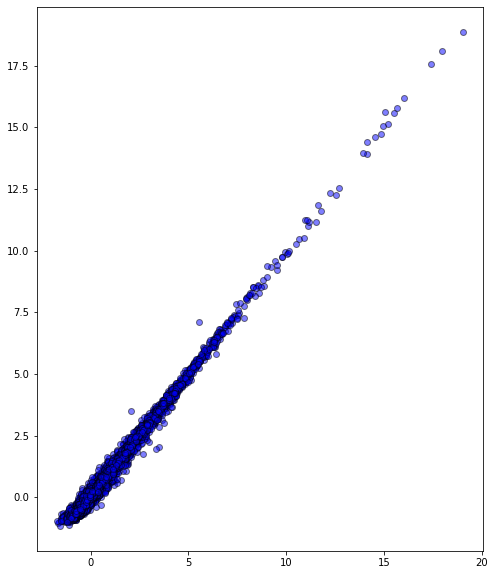

In [122]:
fig = plt.subplots(figsize=(8,10))
plt.plot(y_test_dtm , nn_model_pred_v2, 'bo', alpha= .5,mec="k")
plt.show()

There is not difference in the plot.

<h4>Model Comparison</h4>

In [123]:
comparation_model("Decision Tree Regression Model:",final_predicciones)
print("-----------------------------------------------")
dtrm_r2_v2,dtrm_mse_v2 = comparation_model("Decision Tree Regression Model Version 2:",
                                           final_predicciones_v2)
print("-----------------------------------------------")

Decision Tree Regression Model:
Coefficient of determination(R^2): 0.9281585301027089
Mean Squared Error (MSE): 0.07184146989729111
Root Mean Squared Error (RMSE): 0.26803259111028105
Mean Absolute Error (MAE): 0.17849569995512415
-----------------------------------------------
Decision Tree Regression Model Version 2:
Coefficient of determination(R^2): 0.9281585301027089
Mean Squared Error (MSE): 0.07184146989729111
Root Mean Squared Error (RMSE): 0.26803259111028105
Mean Absolute Error (MAE): 0.17849569995512415
-----------------------------------------------


There is no difference in this dataset in the final results when You use more parameters in the DT model.  

In [124]:
comparation_model("Random Forest Model:",rf_predictions)
print("-----------------------------------------------")
comparation_model("Random Forest Model Version 2:",rf_predictions_v2)
print("-----------------------------------------------")

Random Forest Model:
Coefficient of determination(R^2): 0.9845754476722047
Mean Squared Error (MSE): 0.01542455232779527
Root Mean Squared Error (RMSE): 0.12419562121023135
Mean Absolute Error (MAE): 0.0791583321841343
-----------------------------------------------
Random Forest Model Version 2:
Coefficient of determination(R^2): 0.9861914302703357
Mean Squared Error (MSE): 0.013808569729664256
Root Mean Squared Error (RMSE): 0.11750987077545552
Mean Absolute Error (MAE): 0.07470289785448218
-----------------------------------------------


In the RF model there are differences in the results, the version with more parameters have a little better R2 that shows a better fit and less MSE error.  

In [125]:
comparation_model("Neural Network Model:",nn_model_pred)
print("-----------------------------------------------")
comparation_model("Neural Network Model Version 2:",nn_model_pred_v2 )
print("-----------------------------------------------")

Neural Network Model:
Coefficient of determination(R^2): 0.9852637527052345
Mean Squared Error (MSE): 0.01473624729476552
Root Mean Squared Error (RMSE): 0.12139294581962133
Mean Absolute Error (MAE): 0.09178456627691355
-----------------------------------------------
Neural Network Model Version 2:
Coefficient of determination(R^2): 0.9852637527052345
Mean Squared Error (MSE): 0.01473624729476552
Root Mean Squared Error (RMSE): 0.12139294581962133
Mean Absolute Error (MAE): 0.09178456627691355
-----------------------------------------------


There is no difference in this dataset in the final results when You use more parameters in the DT model.  

**General Conclusion:** <br> The DT is not adecuate model , the RF needs more parameters for the accuracy and the NN is powerful to predict with out more parameters.    

<h3> Exercise 4 </h3>

**Compare your performance using the traint / test approach or using all data (internal validation)**

I will use the standart parameters for each model

In [126]:
#define the models for the cross validation 
MLR_cv = LinearRegression()
DTR_cv = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 17
          )
RF_cv = RandomForestRegressor(n_estimators = 10, random_state = 21)

nn_cv = MLPRegressor(random_state=10, max_iter=500)


In [127]:
#cross-validation MLR
scores_1 = cross_validate(MLR_cv, X, y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_1

{'fit_time': array([0.38709688, 0.17130113, 0.16841006, 0.16419578, 0.17076302,
        0.164083  , 0.166224  , 0.16774607, 0.16432691, 0.16494179]),
 'score_time': array([0.00697327, 0.00493693, 0.00502777, 0.00470519, 0.00514102,
        0.00539279, 0.00551105, 0.00501299, 0.00576115, 0.00479007]),
 'test_r2': array([0.96561813, 0.96398992, 0.96708077, 0.96585397, 0.96612593,
        0.96651695, 0.96508338, 0.96701055, 0.96520514, 0.96309806]),
 'train_r2': array([0.96560186, 0.96577943, 0.96543194, 0.96557637, 0.96554615,
        0.96549894, 0.96566253, 0.96544204, 0.96564831, 0.9658624 ]),
 'test_neg_mean_squared_error': array([-106.76635734, -111.96357777, -108.74278106, -108.56815951,
        -108.14655038, -109.98587706, -110.66627644, -108.32787667,
        -108.93871216, -109.31135685]),
 'train_neg_mean_squared_error': array([-109.37381235, -108.79729825, -109.15496015, -109.17449066,
        -109.22025125, -109.01576331, -108.93968961, -109.19973973,
        -109.13186467, -

In [128]:
#predict
y_MLR_val_pred = cross_val_predict(MLR_cv, X, y, n_jobs=2, verbose=0)  
y_MLR_val_pred 

array([ 1.95464501, 11.09842529, 70.92897885, ..., 90.7777584 ,
       12.81993045, 41.10665293])

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


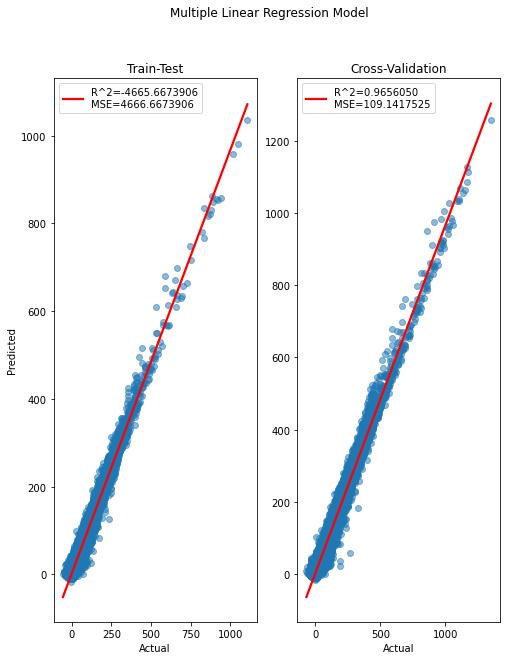

In [129]:
#run the function (10) to plot the predictions of ML
line_plot_model_comparison("Actual","Predicted",m1_predicted_actual_df,
                           mlm_r2,mlm_mse,
                           y,y_MLR_val_pred,
                           scores_1,
                           "Multiple Linear Regression Model")

The cross-validation model shows a better fit but have a worse MSE both models have the same R2 

In [130]:
scores_2 = cross_validate(DTR_cv, X, y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_2

{'fit_time': array([1.07243586, 0.94728303, 0.95178699, 0.95297694, 0.9490869 ,
        0.95069313, 0.9570539 , 0.96320701, 0.96590018, 0.9577632 ]),
 'score_time': array([0.01234698, 0.00863504, 0.00916004, 0.00865793, 0.00797391,
        0.00978184, 0.00833893, 0.00916791, 0.00869489, 0.00793195]),
 'test_r2': array([0.92829087, 0.93032174, 0.93108378, 0.923095  , 0.92663133,
        0.92789149, 0.92927401, 0.93260183, 0.92443123, 0.92368895]),
 'train_r2': array([0.92855142, 0.92846274, 0.92794114, 0.92906747, 0.92881915,
        0.92849039, 0.92834055, 0.92806086, 0.92903425, 0.92960048]),
 'test_neg_mean_squared_error': array([-222.67903632, -216.64566251, -227.65237643, -244.5213602 ,
        -234.2372263 , -236.86363712, -224.16207148, -221.31624578,
        -236.5971138 , -226.04949582]),
 'train_neg_mean_squared_error': array([-227.18099902, -227.43804458, -227.53903365, -224.96243062,
        -225.64650169, -225.95465149, -227.34810812, -227.32055513,
        -225.45107608, -

In [131]:
y_DTR_val_pred = cross_val_predict(DTR_cv, X, y, n_jobs=2, verbose=0)  
y_DTR_val_pred 

array([  3.73765549,   3.73765549,  71.91937032, ..., 105.3772842 ,
        29.56088807,  40.18389507])

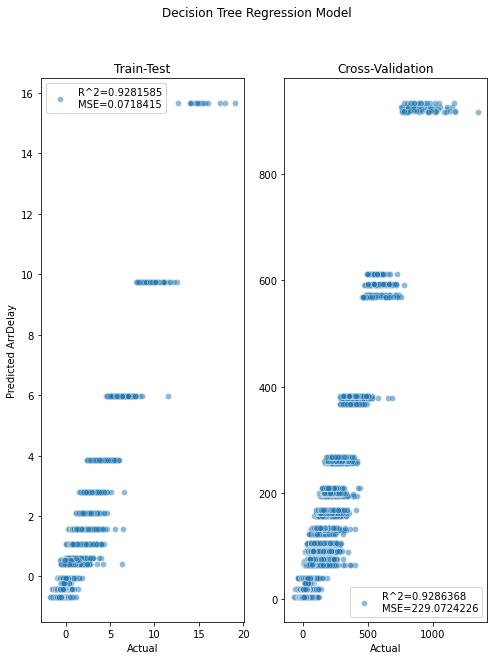

In [132]:
#use the function (9) to plot
subplots_crossvalidation_train("Decision Tree Regression Model","Actual","Predicted ArrDelay",dtrm_r2,dtrm_mse,
                               m2_predicted_actual_df_v2,
                               y,y_DTR_val_pred,scores_2)

The decision tree in cross-validation have a better fit but both models are not robust as we have seen in previous exercises.

In [133]:
scores_3 = cross_validate(RF_cv, X, y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_3

{'fit_time': array([33.61244917, 34.33347297, 34.97374225, 38.24554992, 35.3761909 ,
        34.47044206, 34.56758118, 36.58418202, 31.61546516, 38.02165508]),
 'score_time': array([0.15906715, 0.17324376, 0.24207473, 0.24570203, 0.28395915,
        0.20528102, 0.20007706, 0.26648903, 0.18058586, 0.25086999]),
 'test_r2': array([0.98519079, 0.98470572, 0.98557785, 0.98506453, 0.984739  ,
        0.98492223, 0.98468363, 0.98554076, 0.98471333, 0.98372495]),
 'train_r2': array([0.99726774, 0.99727272, 0.99725885, 0.99727307, 0.99727777,
        0.99723389, 0.99725707, 0.99724061, 0.99721059, 0.99725839]),
 'test_neg_mean_squared_error': array([-45.98718903, -47.55341319, -47.64098354, -47.48769861,
        -48.72236535, -49.52777528, -48.54439309, -47.47999585,
        -47.86081521, -48.21016041]),
 'train_neg_mean_squared_error': array([-8.68759681, -8.67081762, -8.65568611, -8.64844508, -8.6295861 ,
        -8.74028533, -8.70228487, -8.71941532, -8.8616849 , -8.76115112])}

In [134]:
y_RFM_val_pred = cross_val_predict(RF_cv, X, y, n_jobs=2, verbose=0)  
y_RFM_val_pred 

array([-3.2,  9.8, 56.8, ..., 79.9, 20. , 45.7])

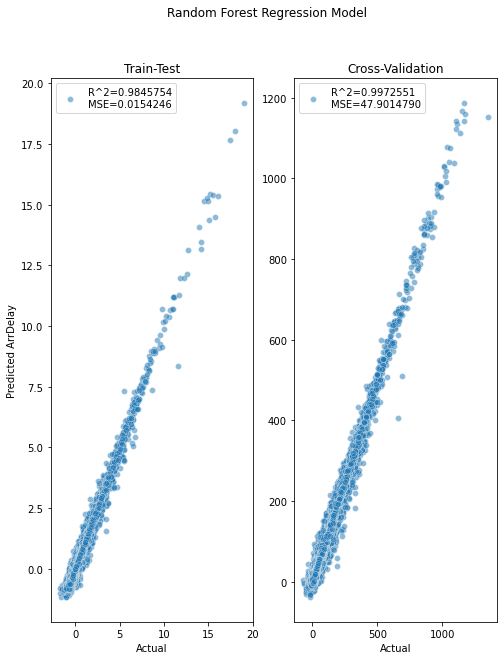

In [135]:
#use the function (9) to plot
subplots_crossvalidation_train("Random Forest Regression Model","Actual","Predicted ArrDelay",
                               rfm_r2, rfm_mse,
                               rf_predictions_df_v2,y,y_RFM_val_pred,scores_3)

The cross-validation model is a better fit a better R2 and less error.  

In [136]:
scores_4 = cross_validate(nn_cv, X, y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_4

{'fit_time': array([27.52589011, 28.4287219 , 28.04936385, 27.05551624, 27.65475798,
        23.80282187, 23.80935717, 30.40909719, 23.03529501, 21.60028291]),
 'score_time': array([0.18770695, 0.18982911, 0.18706322, 0.18886304, 0.18740606,
        0.18797803, 0.18299603, 0.18524861, 0.1869061 , 0.18080902]),
 'test_r2': array([-36.33907666,  -2.74753507,  -0.74483226,   0.38129956,
          0.28914759,   0.57476397,   0.91402224,  -1.27633758,
          0.61013939,  -0.58506786]),
 'train_r2': array([-35.45982236,  -2.66693172,  -0.82850388,   0.37705944,
          0.28280223,   0.55852699,   0.91449834,  -1.36874529,
          0.61569878,  -0.47055971]),
 'test_neg_mean_squared_error': array([-115949.3844234 ,  -11651.94495272,   -5763.74033664,
          -1967.17332928,   -2269.47135036,   -1396.82468506,
           -272.5016995 ,   -7474.83905206,   -1220.60865754,
          -4695.3069459 ]),
 'train_neg_mean_squared_error': array([-115929.226704  ,  -11658.257248  ,   -5773.8354

In [137]:
y_NNM_val_pred = cross_val_predict(nn_cv, X, y, n_jobs=2, verbose=0)  
y_NNM_val_pred 

array([-63.39741902, -65.5134048 ,   0.43476707, ...,  29.34400781,
       -47.30005979, -18.18485272])

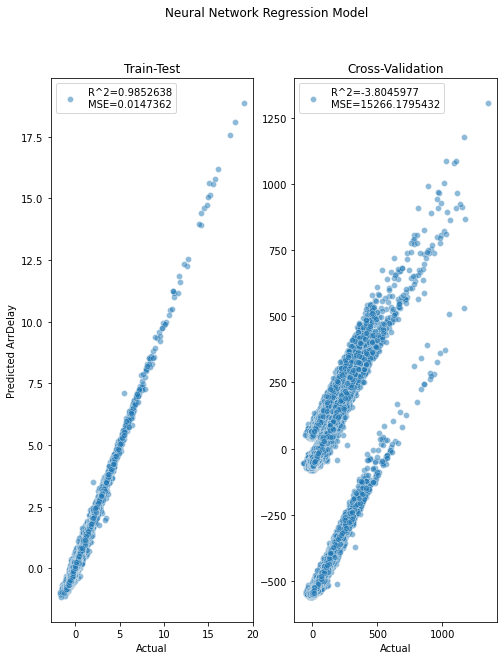

In [138]:
#use the function (9) to plot
subplots_crossvalidation_train("Neural Network Regression Model","Actual","Predicted ArrDelay",
                               nnm_r2, nnm_mse,
                               nn_predictions_df_v2,
                               y,y_NNM_val_pred,scores_4)

The train-test have a better fit, the NN by cross-validation doesn't have a consistent behavior.   

**General Conclusion:** <br> The cross-validation show us that the DT and NN are not good models for this data. The RF is a better model and next the ML.

<h2> Level 2</h2>

<h3>Exercise 5</h3>

**Perform some variable engineering process to improve prediction**

In [139]:
#copy of the DF
df_v1.head().T

,0,1,2,3,4
Date,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00,2008-01-03 00:00:00
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,1829,1940
CRSDepTime,1955,735,620,1755,1915
ArrTime,2211,1002,804,1959,2121
CRSArrTime,2225,1000,750,1925,2110
UniqueCarrier,30.087884,30.087884,30.087884,30.087884,30.087884
FlightNum,335,3231,448,3920,378
TailNum,32.345312,30.708075,27.570952,37.931721,35.086957
ActualElapsedTime,128,128,96,90,101


In [140]:
#speed feature
df_v1 = df_v1.assign(Speed=lambda x: (x["Distance"] / ((x["AirTime"])/60)))
df_v1.head()


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate,Speed
0,2008-01-03,4,2003,1955,2211,2225,30.087884,335,32.345312,128,...,False,42.199771,False,0,0,0,0,0,733044,418.965517
1,2008-01-03,4,754,735,1002,1000,30.087884,3231,30.708075,128,...,False,42.199771,False,0,0,0,0,0,733044,430.088496
2,2008-01-03,4,628,620,804,750,30.087884,448,27.570952,96,...,False,42.199771,False,0,0,0,0,0,733044,406.578947
3,2008-01-03,4,1829,1755,1959,1925,30.087884,3920,37.931721,90,...,False,42.199771,False,2,0,0,0,32,733044,401.298701
4,2008-01-03,4,1940,1915,2121,2110,30.087884,378,35.086957,101,...,False,42.199771,False,0,0,0,0,0,733044,474.482759


In [141]:
#status feature
df_v1["Status"] = np.where(df_v1["ActualElapsedTime"] <= df_v1["CRSElapsedTime"],"OnTime","Delayed")    
df_v1.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate,Speed,Status
0,2008-01-03,4,2003,1955,2211,2225,30.087884,335,32.345312,128,...,42.199771,False,0,0,0,0,0,733044,418.965517,OnTime
1,2008-01-03,4,754,735,1002,1000,30.087884,3231,30.708075,128,...,42.199771,False,0,0,0,0,0,733044,430.088496,OnTime
2,2008-01-03,4,628,620,804,750,30.087884,448,27.570952,96,...,42.199771,False,0,0,0,0,0,733044,406.578947,Delayed
3,2008-01-03,4,1829,1755,1959,1925,30.087884,3920,37.931721,90,...,42.199771,False,2,0,0,0,32,733044,401.298701,OnTime
4,2008-01-03,4,1940,1915,2121,2110,30.087884,378,35.086957,101,...,42.199771,False,0,0,0,0,0,733044,474.482759,OnTime


In [142]:
df_v1.describe()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate,Speed
count,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,...,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06,1.928368e+06
mean,3.984999e+00,1.518648e+03,1.467717e+03,1.610242e+03,1.634196e+03,4.219977e+01,2.184292e+03,4.219961e+01,1.333059e+02,1.341977e+02,...,6.811386e+00,1.821731e+01,4.219977e+01,1.240742e+01,2.395748e+00,9.717681e+00,5.831097e-02,1.636462e+01,7.332121e+05,inf
std,1.996051e+00,4.504355e+02,4.247283e+02,5.480012e+02,4.646287e+02,7.659115e+00,1.944448e+03,9.881334e+00,7.206012e+01,7.123343e+01,...,5.268054e+00,1.430838e+01,7.445495e-10,3.620424e+01,1.737621e+01,2.814335e+01,1.627458e+00,3.592082e+01,1.069608e+02,NaN
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.125538e+01,1.000000e+00,-1.021696e+01,1.400000e+01,-2.100000e+01,...,0.000000e+00,0.000000e+00,4.219977e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.330420e+05,2.129032e+01
25%,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,3.644502e+01,6.110000e+02,3.362712e+01,8.000000e+01,8.200000e+01,...,4.000000e+00,1.000000e+01,4.219977e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.331190e+05,3.518644e+02
50%,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,4.529506e+01,1.543000e+03,4.304427e+01,1.160000e+02,1.160000e+02,...,6.000000e+00,1.400000e+01,4.219977e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.332070e+05,4.038202e+02
75%,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,4.755426e+01,3.423000e+03,4.865854e+01,1.650000e+02,1.650000e+02,...,8.000000e+00,2.100000e+01,4.219977e+01,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01,7.332940e+05,4.481481e+02
max,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,5.528705e+01,9.741000e+03,3.543404e+02,1.114000e+03,6.600000e+02,...,2.400000e+02,4.220000e+02,4.219977e+01,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,7.334070e+05,inf


There are infinites values as we saw previously some data of the DF have inconsistent. 

In [143]:
#remplace the infinite values with nan
df_v1.replace([np.inf, -np.inf], np.nan,inplace=True)


In [144]:
#know the number of nan values with the function ()
percent_nan(df_v1)

Date                 0.0
DayOfWeek            0.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
UniqueCarrier        0.0
FlightNum            0.0
TailNum              0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
ArrDelay             0.0
DepDelay             0.0
Origin               0.0
Dest                 0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
Cancelled            0.0
CancellationCode     0.0
Diverted             0.0
CarrierDelay         0.0
WeatherDelay         0.0
NASDelay             0.0
SecurityDelay        0.0
LateAircraftDelay    0.0
OrdinalDate          0.0
Speed                0.0
Status               0.0
dtype: float64

The nan numbers are negligible so we can drop them.  

In [145]:
#drop the nan values because their number is small
df_v1.dropna(inplace=True)
np.isinf(df_v1.Speed).any()

False

In [146]:
#target encoding of the new status feature
ev_v1 = ce.TargetEncoder(cols="Status")
df_v1["Status"]= ev_v1.fit_transform(df_v1["Status"],df_v1['ArrDelay'])

In [147]:
#run the function (4) to get the Variance Inflation Factor(VIF)
vif(df_v1.select_dtypes(np.number)) 

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,Variance Inflation Factor(VIF)
0,DayOfWeek,1.001854e+00
1,DepTime,5.191111e+00
2,CRSDepTime,5.115670e+00
3,ArrTime,1.725360e+00
4,CRSArrTime,2.921573e+00
5,UniqueCarrier,2.742767e+00
6,FlightNum,1.367879e+00
7,TailNum,2.691696e+00
8,ActualElapsedTime,inf
9,CRSElapsedTime,8.155240e+08


In [148]:
#new DF sample 
df_sample_v2 = df_v1.sample(n = sample_size, random_state=7)
df_sample_v2

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OrdinalDate,Speed,Status
259240,2008-02-13,3,1732,1700,2055,2019,47.784399,540,52.353247,143,...,42.199771,False,0,0,36,0,0,733085,437.142857,60.731261
337980,2008-02-11,1,1040,1020,1139,1125,46.561553,705,46.243560,119,...,42.199771,False,0,0,0,0,0,733083,392.448980,31.819981
370731,2008-02-05,2,1501,1451,1615,1616,39.881507,945,27.985240,194,...,42.199771,False,0,0,0,0,0,733077,415.838150,31.819981
866314,2008-05-31,6,1058,1050,1357,1349,36.060882,631,34.569444,179,...,42.199771,False,0,0,0,0,0,733193,454.931507,31.819981
23143,2008-01-25,5,1524,1510,1556,1545,30.087884,2092,28.855204,92,...,42.199771,False,0,0,0,0,0,733066,382.105263,31.819981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173740,2008-01-27,7,1917,1910,2227,2220,40.568449,88,38.183544,250,...,42.199771,False,0,0,0,0,0,733068,451.612903,31.819981
1530845,2008-10-12,7,1427,1350,2046,2025,30.087884,973,32.723468,199,...,42.199771,False,4,0,0,0,17,733327,524.921466,31.819981
1534260,2008-10-17,5,1459,1430,1512,1445,30.087884,24,24.484536,73,...,42.199771,False,20,0,0,0,7,733332,365.263158,31.819981
1277733,2008-08-13,3,1901,1840,2336,2320,30.087884,122,30.085457,155,...,42.199771,False,16,0,0,0,0,733267,497.518248,31.819981


In [149]:
#Make a copy of the DF for the next level
df_v2 = df_sample_v2.copy()

In [150]:
# Features to drop as have a high VIF number
X_v2 = df_sample_v2.drop(columns=['Date','ArrDelay','Cancelled','Diverted','Distance','AirTime',
                                 'CRSArrTime','ActualElapsedTime'])
X_v2.head().T

,259240,337980,370731,866314,23143
DayOfWeek,3.000000,1.000000,2.000000,6.000000,5.000000
DepTime,1732.000000,1040.000000,1501.000000,1058.000000,1524.000000
CRSDepTime,1700.000000,1020.000000,1451.000000,1050.000000,1510.000000
ArrTime,2055.000000,1139.000000,1615.000000,1357.000000,1556.000000
UniqueCarrier,47.784399,46.561553,39.881507,36.060882,30.087884
FlightNum,540.000000,705.000000,945.000000,631.000000,2092.000000
TailNum,52.353247,46.243560,27.985240,34.569444,28.855204
CRSElapsedTime,139.000000,125.000000,205.000000,179.000000,95.000000
DepDelay,32.000000,20.000000,10.000000,8.000000,14.000000
Origin,50.954747,37.757864,40.782994,30.596674,45.598708


In [151]:
y_v2 = df_sample_v2['ArrDelay']
y_v2.head()

259240    36
337980    14
370731    -1
866314     8
23143     11
Name: ArrDelay, dtype: int64

In [152]:
#create the models
MLR_cv_v2 = LinearRegression()
DTR_cv_v2 = DecisionTreeRegressor(
            max_depth         = 4,
            random_state      = 17
          )
RF_cv_v2 = RandomForestRegressor(n_estimators = 10, random_state = 21)

nn_cv_v2 = MLPRegressor(random_state=10, max_iter=500)

In [153]:
#MLR cross-validation  
scores_1_v2 = cross_validate(MLR_cv_v2, X_v2, y_v2, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)
scores_1_v2

{'fit_time': array([0.33261085, 0.23477721, 0.23656917, 0.23396301, 0.23308325,
        0.23010111, 0.23117304, 0.22837615, 0.26649189, 0.22945213]),
 'score_time': array([0.00851297, 0.00893092, 0.00838184, 0.00742984, 0.00749588,
        0.00727296, 0.00764799, 0.00800514, 0.00977325, 0.0076139 ]),
 'test_r2': array([0.99165789, 0.99350497, 0.99348133, 0.99358476, 0.99352398,
        0.993741  , 0.99368249, 0.99350577, 0.99323354, 0.99395333]),
 'train_r2': array([0.99362297, 0.99354272, 0.99354516, 0.99353372, 0.99354062,
        0.99351634, 0.99352237, 0.99354255, 0.99357185, 0.99349014]),
 'test_neg_mean_squared_error': array([-25.06196592, -20.74616049, -20.0615223 , -20.30118085,
        -20.34720343, -19.88485823, -20.54830824, -20.08128015,
        -20.74495133, -20.06403223]),
 'train_neg_mean_squared_error': array([-20.18300021, -20.3006341 , -20.37669229, -20.35031124,
        -20.34482113, -20.39604321, -20.32265302, -20.37448962,
        -20.30077555, -20.37633321])}

In [154]:
#predict
y_MLR_val_pred_v2 = cross_val_predict(MLR_cv_v2, X_v2, y_v2, n_jobs=2, verbose=0)  
y_MLR_val_pred_v2 

array([36.72800361,  4.66311675,  1.41712814, ..., 28.08762923,
       16.10934747, 18.45693011])

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


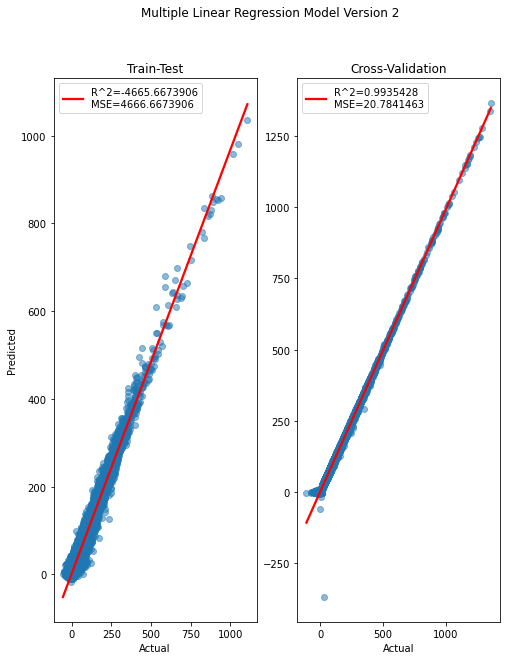

In [155]:
#run the function (10) to plot the predictions of ML
line_plot_model_comparison("Actual","Predicted",m1_predicted_actual_df,
                           mlm_r2,mlm_mse,
                           y_v2,y_MLR_val_pred_v2,
                           scores_1_v2,
                           "Multiple Linear Regression Model Version 2")

With the feature engineering the difference is abismal, it looks like an overfitting model.

In [156]:
#DTR model
scores_2_v2 = cross_validate(DTR_cv_v2, X_v2, y_v2, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_2_v2

{'fit_time': array([1.18997502, 1.10687113, 1.09293318, 1.12216187, 1.09545088,
        1.12775564, 1.11829805, 1.11791205, 1.09867096, 1.10274696]),
 'score_time': array([0.00974488, 0.00968599, 0.00968385, 0.01193404, 0.0099771 ,
        0.00971413, 0.00971985, 0.01106787, 0.00969791, 0.01080394]),
 'test_r2': array([0.9255679 , 0.933409  , 0.92903123, 0.93013089, 0.92898186,
        0.93386803, 0.93307015, 0.92508024, 0.92956958, 0.93193345]),
 'train_r2': array([0.93133713, 0.93028155, 0.93083515, 0.93091012, 0.93047962,
        0.93036202, 0.93013805, 0.93119012, 0.93097269, 0.93026574]),
 'test_neg_mean_squared_error': array([-223.61434643, -212.70211695, -218.40989452, -221.10238358,
        -223.13391024, -210.10130332, -217.69590986, -231.66468189,
        -215.92903084, -225.85815317]),
 'train_neg_mean_squared_error': array([-217.31478312, -219.18340265, -218.34018933, -217.43567444,
        -218.96534877, -219.06427737, -219.18199701, -217.10831091,
        -217.99568521, -

In [157]:
#predict
y_DTR_val_pred_v2 = cross_val_predict(DTR_cv_v2, X_v2, y_v2, n_jobs=2, verbose=0)  
y_DTR_val_pred_v2 

array([29.65226295, 17.6817983 ,  3.76924435, ..., 17.6903531 ,
       17.6903531 , 17.6903531 ])

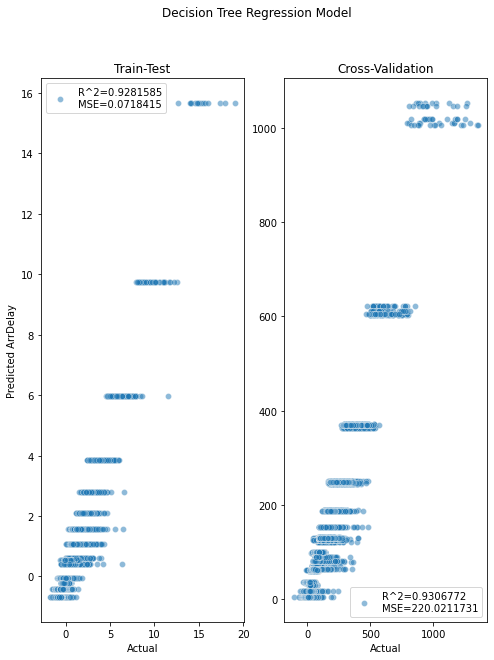

In [158]:
#use the function (9) to plot
subplots_crossvalidation_train("Decision Tree Regression Model","Actual","Predicted ArrDelay",
                               dtrm_r2,dtrm_mse,
                               m2_predicted_actual_df_v2,
                               y_v2,y_DTR_val_pred_v2,
                               scores_2_v2)

The feature engineering improve the model but it doesn't look good, DT is not a model for this exercise. 

In [159]:
#RF model
scores_3_v2 = cross_validate(RF_cv_v2, X_v2, y_v2, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_3_v2

{'fit_time': array([42.37787509, 37.75068521, 37.41048813, 37.51383185, 41.7321341 ,
        40.13579392, 37.58203101, 37.51111507, 37.80392289, 37.67737508]),
 'score_time': array([0.13845086, 0.17151785, 0.15497494, 0.16909122, 0.15287304,
        0.16349626, 0.15548992, 0.14798307, 0.1549499 , 0.17361617]),
 'test_r2': array([0.99375777, 0.99389436, 0.99376876, 0.99339859, 0.9938321 ,
        0.99420305, 0.99417046, 0.99382472, 0.99321708, 0.99419042]),
 'train_r2': array([0.99885795, 0.99887165, 0.99885338, 0.99886611, 0.99886699,
        0.99884448, 0.99885811, 0.9988532 , 0.9988536 , 0.99884867]),
 'test_neg_mean_squared_error': array([-18.75337378, -19.50235739, -19.17694116, -20.8903139 ,
        -19.37908525, -18.41692031, -18.96115782, -19.09501296,
        -20.7953943 , -19.27731582]),
 'train_neg_mean_squared_error': array([-3.61453614, -3.54733771, -3.61967568, -3.56849871, -3.56859028,
        -3.63499278, -3.58251938, -3.61837548, -3.62044401, -3.60373403])}

In [160]:
#predict
y_RFM_val_pred_v2 = cross_val_predict(RF_cv_v2, X_v2, y_v2, n_jobs=2, verbose=0)  
y_RFM_val_pred_v2 

array([36. , 12.1,  1.7, ..., 26.5, 16. , 18. ])

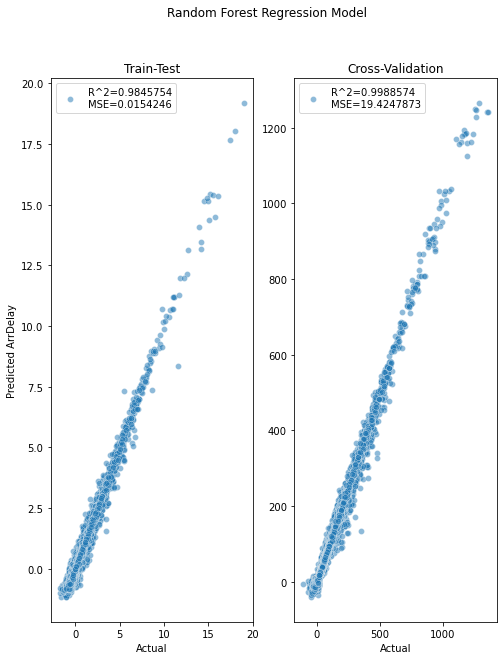

In [161]:
#use the function (9) to plot
subplots_crossvalidation_train("Random Forest Regression Model","Actual","Predicted ArrDelay",
                               rfm_r2, rfm_mse,
                               rf_predictions_df_v2,
                               y_v2,y_RFM_val_pred_v2,scores_3_v2)

The RF have a better fit, it doesn't look overfitting and have a good R2 and small SME in comparison to the prediction of the same model with Train-Test.

In [162]:
#neural network model
scores_4_v2 = cross_validate(nn_cv_v2, X_v2, y_v2, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_4_v2

{'fit_time': array([33.76950693, 32.56575084, 31.77734971, 31.36807609, 31.16204596,
        27.23814297, 28.29785681, 33.98863935, 31.65154719, 27.14989185]),
 'score_time': array([0.21626902, 0.21997619, 0.21652603, 0.21540976, 0.21405602,
        0.20965195, 0.27475214, 0.22968483, 0.2121501 , 0.22010112]),
 'test_r2': array([  -1.22003056,    0.73658357,    0.84756734,   -0.25898968,
           0.91848961,    0.86347799,    0.94131856,    0.9253468 ,
         -52.45376475, -111.63201409]),
 'train_r2': array([  -1.10662738,    0.73251026,    0.85141822,   -0.26558092,
           0.91882958,    0.86159692,    0.93978072,    0.92673548,
         -50.88418411, -118.41727661]),
 'test_neg_mean_squared_error': array([-6.66957805e+03, -8.41393419e+02, -4.69119024e+02, -3.98410134e+03,
        -2.56099789e+02, -4.33730516e+02, -1.90867140e+02, -2.30840456e+02,
        -1.63881178e+05, -3.73735107e+05]),
 'train_neg_mean_squared_error': array([-6.66737762e+03, -8.40944026e+02, -4.69044259e

In [163]:
#predict
y_NNM_val_pred_v2 = cross_val_predict(nn_cv_v2, X_v2, y_v2, n_jobs=2, verbose=0)  
y_NNM_val_pred_v2 

array([ 82.37037231,  48.49887371,  42.86499357, ..., 145.51439099,
       133.61254949, 143.34217651])

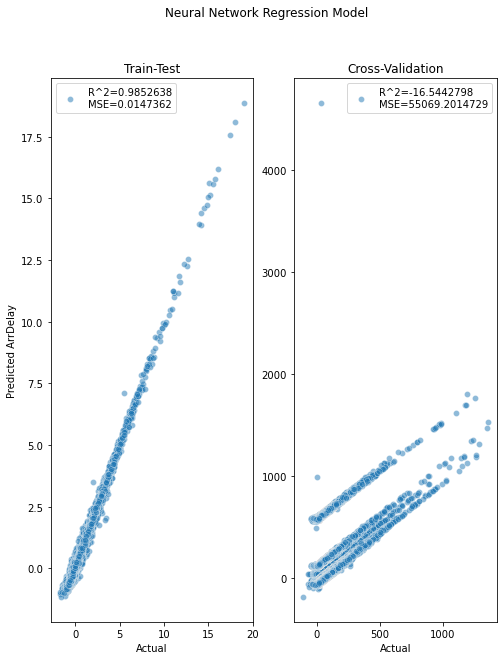

In [164]:
#use the function (9) to plot
subplots_crossvalidation_train("Neural Network Regression Model","Actual","Predicted ArrDelay",
                               nnm_r2, nnm_mse,
                               nn_predictions_df_v2,
                               y_v2,y_NNM_val_pred_v2 ,scores_4_v2)

The feature engineering doesn't improve the NN by cross-validation the Train-Test have a better fit.

**General Conclusion:** <br> The feature engineering doesn't change the previous conclusion, the RF is better and second best the ML but the latter have a overfitting behavior.   

<h2>Level 3</h3>

<h3>Exercise 6</h3>

**Do not use the DepDelay variable when making predictions**

I will use the copy of the DF with feature engineering from the previous level to perform this exercise and perform only the cross-validation. 

In [165]:
df_v2.head().T

,259240,337980,370731,866314,23143
Date,2008-02-13 00:00:00,2008-02-11 00:00:00,2008-02-05 00:00:00,2008-05-31 00:00:00,2008-01-25 00:00:00
DayOfWeek,3,1,2,6,5
DepTime,1732,1040,1501,1058,1524
CRSDepTime,1700,1020,1451,1050,1510
ArrTime,2055,1139,1615,1357,1556
CRSArrTime,2019,1125,1616,1349,1545
UniqueCarrier,47.784399,46.561553,39.881507,36.060882,30.087884
FlightNum,540,705,945,631,2092
TailNum,52.353247,46.24356,27.98524,34.569444,28.855204
ActualElapsedTime,143,119,194,179,92


In [166]:
#run the function (4) to get the Variance Inflation Factor(VIF)
vif(df_v2.select_dtypes(np.number)) 

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,Variance Inflation Factor(VIF)
0,DayOfWeek,1.002135e+00
1,DepTime,5.248507e+00
2,CRSDepTime,5.145239e+00
3,ArrTime,1.748258e+00
4,CRSArrTime,2.925627e+00
5,UniqueCarrier,2.737599e+00
6,FlightNum,1.366746e+00
7,TailNum,2.680807e+00
8,ActualElapsedTime,inf
9,CRSElapsedTime,2.941842e+08


In [167]:
#DF sample
df_sample_v3 = df_v2.sample(n = sample_size, random_state=7)
df_sample_v3.head().T

,200241,51104,1811506,627668,257080
Date,2008-02-15 00:00:00,2008-01-30 00:00:00,2008-12-22 00:00:00,2008-04-17 00:00:00,2008-02-21 00:00:00
DayOfWeek,5,3,1,4,4
DepTime,2043,1054,2209,2125,1454
CRSDepTime,2015,1045,1749,2110,1437
ArrTime,2313,1250,119,2241,1623
CRSArrTime,2255,1245,2101,2215,1551
UniqueCarrier,30.087884,51.01325,47.784399,45.370587,47.784399
FlightNum,888,5386,195,4062,357
TailNum,31.64794,56.692464,50.776524,34.353468,49.459716
ActualElapsedTime,150,116,370,136,149


In [168]:
#drop the models with high VIF and the DepDelay
X_v3 = df_sample_v2.drop(columns=['Date','ArrDelay','Cancelled','Diverted','Distance','AirTime',
                                 'CRSArrTime','ActualElapsedTime','DepDelay','CRSDepTime','CRSArrTime',
                                 'CancellationCode','CarrierDelay'])
X_v3.head().T

,259240,337980,370731,866314,23143
DayOfWeek,3.000000,1.000000,2.000000,6.000000,5.000000
DepTime,1732.000000,1040.000000,1501.000000,1058.000000,1524.000000
ArrTime,2055.000000,1139.000000,1615.000000,1357.000000,1556.000000
UniqueCarrier,47.784399,46.561553,39.881507,36.060882,30.087884
FlightNum,540.000000,705.000000,945.000000,631.000000,2092.000000
TailNum,52.353247,46.243560,27.985240,34.569444,28.855204
CRSElapsedTime,139.000000,125.000000,205.000000,179.000000,95.000000
Origin,50.954747,37.757864,40.782994,30.596674,45.598708
Dest,48.904260,37.506698,37.506698,35.599981,36.354936
TaxiIn,3.000000,6.000000,8.000000,9.000000,7.000000


In [169]:
y_v3 = df_sample_v3['ArrDelay']
y_v3.head()

200241      18
51104        5
1811506    258
627668      26
257080      32
Name: ArrDelay, dtype: int64

In [170]:
#cross-validation MLR
scores_1_v3 = cross_validate(MLR_cv_v2, X_v3, y_v3, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)
scores_1_v3

{'fit_time': array([0.59964609, 0.2182219 , 0.18248487, 0.16200304, 0.16181612,
        0.16491389, 0.16652799, 0.16086388, 0.18550181, 0.16100478]),
 'score_time': array([0.02127409, 0.00650501, 0.00482416, 0.00533295, 0.00482893,
        0.00465894, 0.00535917, 0.00463223, 0.00479317, 0.00488114]),
 'test_r2': array([-6.99280160e-05, -3.14815600e-04, -1.47476283e-04, -1.19826462e-05,
         2.51693954e-06, -5.88452868e-05,  2.40805332e-05,  1.72227829e-04,
        -3.21671497e-04,  7.62186481e-05]),
 'train_r2': array([0.00010335, 0.00017897, 0.0001615 , 0.00014537, 0.00014402,
        0.00014822, 0.00014479, 0.00012503, 0.00016694, 0.00013825]),
 'test_neg_mean_squared_error': array([-2975.12817171, -3177.4348408 , -3186.51566764, -3084.30788375,
        -3062.87813096, -3149.2324725 , -3113.38501362, -3369.23091005,
        -3248.26907327, -3123.78515155]),
 'train_neg_mean_squared_error': array([-3167.88664783, -3145.26544082, -3144.24897032, -3155.60947444,
        -3157.979998

In [171]:
#predict
y_MLR_val_pred_v3 = cross_val_predict(MLR_cv_v2, X_v3, y_v3, n_jobs=2, verbose=0)  
y_MLR_val_pred_v3 

array([42.21453888, 41.91660323, 41.84736262, ..., 41.50571269,
       42.08927379, 41.84336686])

/Users/franciscoregalado/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


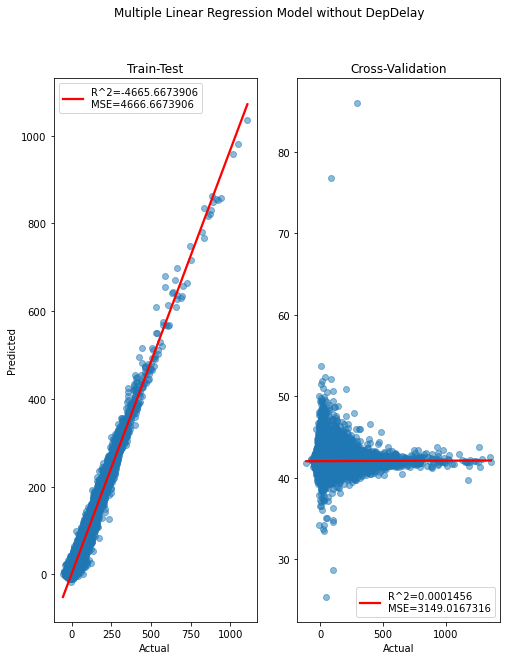

In [172]:
#run the function (10) to plot the predictions of ML
line_plot_model_comparison("Actual","Predicted",m1_predicted_actual_df,
                           mlm_r2,mlm_mse,
                           y_v3,y_MLR_val_pred_v3,
                           scores_1_v3,
                           "Multiple Linear Regression Model without DepDelay")

The DepDelay have a VIF of 1.600617e+08 this show the high dependency of the ArrDelay with this feature, when we drop DepDelay the predictions are bad. 

In [173]:
#DT model
scores_2_v3 = cross_validate(DTR_cv_v2, X_v3, y_v3, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_2_v3

{'fit_time': array([1.33203793, 1.06195188, 1.11125803, 1.17472792, 1.13274908,
        1.17030716, 1.28892899, 1.33922386, 1.22391391, 1.21668816]),
 'score_time': array([0.01223493, 0.00838518, 0.01146388, 0.00813174, 0.00796795,
        0.00862265, 0.01051211, 0.00766802, 0.00859809, 0.0090282 ]),
 'test_r2': array([-1.52408323e-02, -1.77423825e-04, -1.51133553e-04, -2.04057657e-04,
        -2.41526492e-04, -2.74307990e-04, -2.19167033e-03, -1.70203722e-04,
        -4.39127392e-04, -8.01059696e-06]),
 'train_r2': array([0.00187968, 0.00036614, 0.00035427, 0.00061773, 0.0002976 ,
        0.00031512, 0.00090138, 0.00066411, 0.00084779, 0.00079739]),
 'test_neg_mean_squared_error': array([-3020.26040057, -3176.99842478, -3186.52731987, -3084.90029513,
        -3063.62560813, -3149.91097472, -3120.28366528, -3370.38483976,
        -3248.65047893, -3124.04828567]),
 'train_neg_mean_squared_error': array([-3162.25887458, -3144.67666196, -3143.64275697, -3154.11868545,
        -3157.494955

In [174]:
#prediction
y_DTR_val_pred_v3 = cross_val_predict(DTR_cv_v2, X_v3, y_v3, n_jobs=2, verbose=0)  
y_DTR_val_pred_v3 

array([41.87788603, 41.87788603, 41.87788603, ..., 41.74322746,
       41.74322746, 41.74322746])

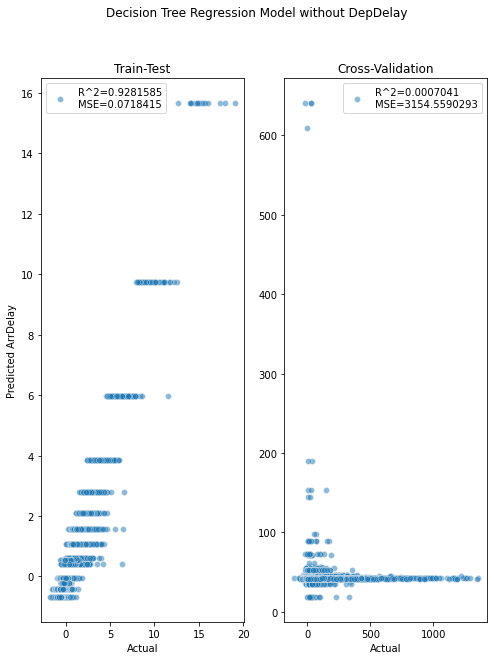

In [175]:
#use the function (9) to plot
subplots_crossvalidation_train("Decision Tree Regression Model without DepDelay",
                               "Actual","Predicted ArrDelay",
                               dtrm_r2,dtrm_mse,
                               m2_predicted_actual_df_v2,
                               y_v3,y_DTR_val_pred_v3,
                               scores_2_v3)

the DT is the worse model and when the DepDelay is dropped its predictions are worse.  

In [176]:
#random forest
scores_3_v3 = cross_validate(RF_cv_v2, X_v3, y_v3, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_3_v3

{'fit_time': array([68.50298905, 70.96360278, 75.12220287, 83.07666397, 85.08465981,
        70.37061119, 68.08092427, 69.99031997, 72.63594866, 70.86308217]),
 'score_time': array([0.25726104, 0.27083707, 0.28962708, 0.45210695, 0.39156199,
        0.26982188, 0.30391288, 0.29376197, 0.2913022 , 0.25738907]),
 'test_r2': array([-0.17106482, -0.15522279, -0.14963827, -0.15140825, -0.1519916 ,
        -0.1549458 , -0.14327247, -0.13902521, -0.15156071, -0.15210011]),
 'train_r2': array([0.79138664, 0.79193351, 0.79014862, 0.79119985, 0.79085308,
        0.79036276, 0.78919304, 0.78895166, 0.78943558, 0.79173262]),
 'test_neg_mean_squared_error': array([-3483.82432863, -3669.48994227, -3662.80018426, -3551.2549879 ,
        -3528.41876893, -3636.97878341, -3559.53308176, -3838.30002005,
        -3739.37619741, -3599.18754814]),
 'train_neg_mean_squared_error': array([-660.93179615, -654.54148935, -659.93156771, -658.98752513,
        -660.57694072, -660.11835689, -664.637638  , -659.3853

In [177]:
#predict
y_RFM_val_pred_v3 = cross_val_predict(RF_cv_v2, X_v3, y_v3, n_jobs=2, verbose=0)  
y_RFM_val_pred_v3 

array([66.3, 39.4,  8.5, ..., 43.1, 36.9, 40.5])

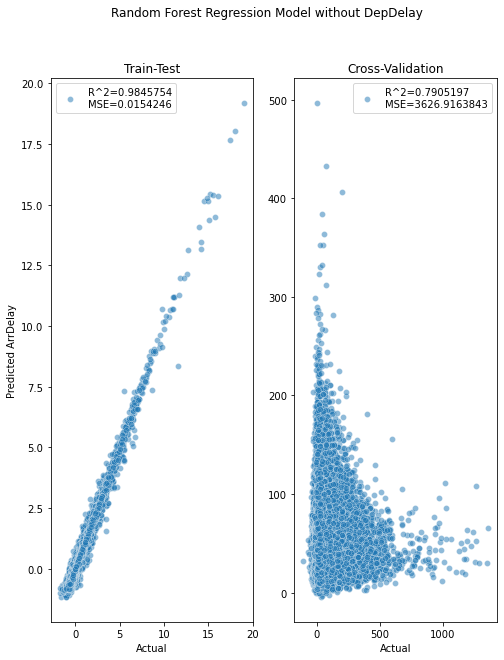

In [178]:
#use the function (9) to plot
subplots_crossvalidation_train("Random Forest Regression Model without DepDelay",
                               "Actual","Predicted ArrDelay",
                               rfm_r2, rfm_mse,
                               rf_predictions_df_v2,
                               y_v3,y_RFM_val_pred_v3,scores_3_v3)

The random forest prediction get worse without DepDelay.

In [179]:
#NN model
scores_4_v3 = cross_validate(nn_cv_v2, X_v3, y_v3, cv=10,
                         scoring=('r2', 'neg_mean_squared_error'),
                       return_train_score=True)

scores_4_v3

{'fit_time': array([27.54931474, 25.7052269 , 26.44990182, 26.09234405, 25.55001593,
        25.44310021, 26.72756505, 25.75184202, 25.70779181, 25.63465691]),
 'score_time': array([0.13744211, 0.13587523, 0.14305925, 0.14035511, 0.13165736,
        0.13389897, 0.13123417, 0.1375289 , 0.14313507, 0.13930917]),
 'test_r2': array([ -27.0331531 ,  -14.96618012, -103.48837537,  -65.71539949,
          -0.55126548,   -2.09570616,  -22.78296762,   -0.62397822,
          -1.61836652,   -8.00323095]),
 'train_r2': array([ -25.42802626,  -15.12952125, -104.92069286,  -64.19145521,
          -0.542572  ,   -2.07785674,  -22.49530364,   -0.66439921,
          -1.70615894,   -7.91796391]),
 'test_neg_mean_squared_error': array([ -83396.39177893,  -50715.53095225, -332904.74964499,
        -205768.36696564,   -4751.34907307,   -9748.52470229,
         -74047.31805609,   -5472.50014214,   -8502.42400012,
         -28126.30291964]),
 'train_neg_mean_squared_error': array([ -83729.64513528,  -50740.70

In [180]:
#predict
y_NNM_val_pred_v3 = cross_val_predict(nn_cv_v2, X_v3, y_v3, n_jobs=2, verbose=0)  
y_NNM_val_pred_v3 

array([ 3.68059327, -1.96776744, -4.0694787 , ..., 74.77795207,
       75.50259868, 72.23785239])

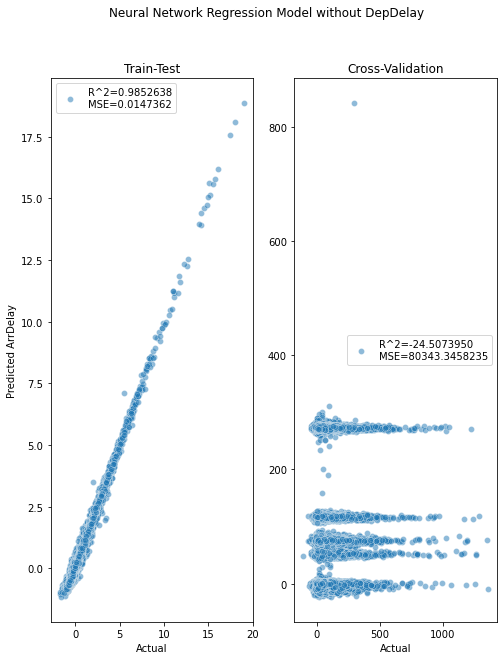

In [181]:
#use the function (9) to plot
subplots_crossvalidation_train("Neural Network Regression Model without DepDelay","Actual","Predicted ArrDelay",
                               nnm_r2, nnm_mse,
                               nn_predictions_df_v2,
                               y_v3,y_NNM_val_pred_v3 ,scores_4_v3)

The same goes with NN it's prediction are getting worse without DepDelay.

**General Conclusion:** <br> There are features with high dependency but we need them for a good model as DepDelay. The predictions have a really good fit and maybe its the results of having many features for training that may overfit  the models.  